## Code for running penalized linear regression and other models for ML project
<b/>Written by Aparna Sundaram on 08/22/19 <b>
    
    

In [947]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('ggplot')
%matplotlib inline

<b/> Read in the datasets and examine them <b>

In [948]:
train = pd.read_csv('new_train.csv', index_col=0)
train=train.reset_index()
train.shape

(1460, 51)

In [925]:
train.head()

,Id,Lsaleprice,Ltotbsmtsf,L1stflrSF,Lgrlivarea,Lgaragearea,durbuilt,durremod,hqualcat,fullbathcat,...,garCcat,pavedum,saleTdum,saleCcat,MSSubcat,alleydum,fencedum,fireYN,Neighborhood,Ltothousearea
0,1,12.247694,6.752270,6.752270,7.444249,6.306275,5,5,4,2,...,2,1,1,1,2,0,0,0,CollgCr,8.043663
1,2,12.109011,7.140453,7.140453,7.140453,6.131226,31,31,3,2,...,2,1,1,1,1,0,0,1,Veenker,8.001020
2,3,12.317167,6.824374,6.824374,7.487734,6.410175,7,6,4,2,...,2,1,1,1,2,0,0,1,CollgCr,8.105911
3,4,11.849398,6.628041,6.867974,7.448334,6.464588,91,36,4,1,...,2,1,1,2,2,0,0,1,Crawfor,8.043984
4,5,12.429216,7.043160,7.043160,7.695303,6.728629,8,8,5,2,...,2,1,1,1,2,0,0,1,NoRidge,8.337827


In [949]:
test = pd.read_csv('new_test.csv', index_col=0)
test=test.reset_index()
test.shape

(1459, 49)

In [926]:
test.head()

,Id,Ltotbsmtsf,L1stflrSF,Lgrlivarea,Lgaragearea,durbuilt,durremod,hqualcat,fullbathcat,totrmscat,...,garQcat,garCcat,pavedum,saleTdum,saleCcat,MSSubcat,alleydum,fencedum,fireYN,Neighborhood
0,1461,6.782192,6.797940,6.797940,6.593045,49,49,2,1,2,...,2,2,1,1,1,1,0,1,0,NAmes
1,1462,7.192182,7.192182,7.192182,5.743003,52,52,3,1,3,...,2,2,1,1,1,1,0,0,0,NAmes
2,1463,6.833032,6.833032,7.395722,6.177944,13,12,2,2,3,...,2,2,1,1,1,2,0,1,1,Gilbert
3,1464,6.830874,6.830874,7.380256,6.152733,12,12,3,2,4,...,2,2,1,1,1,2,0,0,1,Gilbert
4,1465,7.154615,7.154615,7.154615,6.226537,18,18,5,2,2,...,2,2,1,1,1,4,0,0,0,StoneBr


In [927]:
train = train.sort_values(by=['Id'])
test = test.sort_values(by=['Id'])

In [914]:
test2 = pd.read_csv('test.csv', index_col=0)
#test=test.reset_index()
test2.shape

(1459, 79)

In [915]:
duplicate = train[train.duplicated()]
duplicate

,Lsaleprice,Ltotbsmtsf,L1stflrSF,Lgrlivarea,Lgaragearea,durbuilt,durremod,hqualcat,fullbathcat,totrmscat,...,garCcat,pavedum,saleTdum,saleCcat,MSSubcat,alleydum,fencedum,fireYN,Neighborhood,Ltothousearea


In [929]:
test.head()
test.shape

(1459, 49)

In [891]:
## Don't worry about this

#duplicate = test[test.duplicated()]
#duplicate

In [974]:
train.dtypes

In [ ]:
train.shape

In [ ]:
train.describe()
test.describe()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000182C6B3AA58>,
      dtype=object)

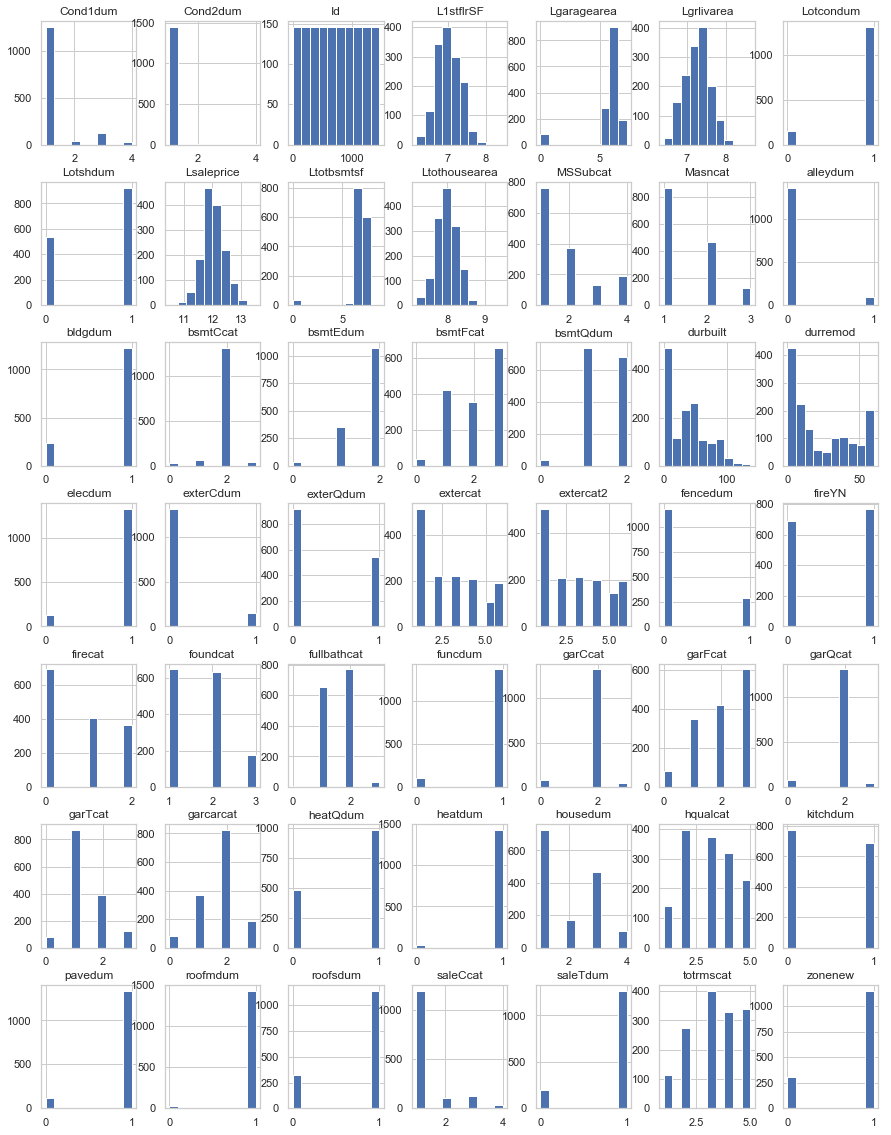

In [930]:
pd.DataFrame.hist(data=train, figsize=(15,20))

In [966]:
## Check for missing values, though there shouldn't be any since they were imputed by KNN. 
missingRows = train.isnull().values.any(axis=0)
missingCols = train.isnull().values.any(axis=1)

missingRows
missingCols

array([False, False, False, ..., False, False, False])

In [ ]:
#train['hqualcat']

<b/> Put the full set of features into a new dataframe called houseFeatures, which will be the X in the regression <b>
    
    
<b/> The y will be set to a new series <b>    

In [1017]:
## For the training set.

houseFeatures = train[['Ltotbsmtsf', 'L1stflrSF', 'Lgrlivarea', 'Lgaragearea', 'durbuilt', 
                  'durremod', 'hqualcat', 'fullbathcat', 'totrmscat', 'garcarcat', 'zonenew', 'Lotshdum',
                  'Lotcondum', 'Cond1dum','bldgdum', 'housedum', 'roofsdum', 'roofmdum', 'extercat',
                  'extercat2', 'Masncat', 'exterQdum', 'exterCdum', 'foundcat', 'bsmtQdum', 'bsmtCcat', 'bsmtEdum',
                  'bsmtFcat', 'heatdum', 'heatQdum', 'CentralAir', 'elecdum', 'kitchdum', 'funcdum',
                  'garTcat', 'garFcat', 'garQcat', 'garCcat', 'pavedum', 'saleTdum', 'saleCcat', 'MSSubcat', 'alleydum',
                  'fencedum','fireYN','Neighborhood']].copy()
saleprice       = train['Lsaleprice']


In [990]:
## For the testing set.

houseFeaturesT = test[['Ltotbsmtsf', 'L1stflrSF', 'Lgrlivarea', 'Lgaragearea', 'durbuilt', 
                  'durremod', 'hqualcat', 'fullbathcat', 'totrmscat', 'garcarcat', 'zonenew', 'Lotshdum',
                  'Lotcondum', 'Cond1dum','bldgdum', 'housedum', 'roofsdum', 'roofmdum', 'extercat',
                  'extercat2', 'Masncat', 'exterQdum', 'exterCdum', 'foundcat', 'bsmtQdum', 'bsmtCcat', 'bsmtEdum',
                  'bsmtFcat', 'heatdum', 'heatQdum', 'CentralAir', 'elecdum', 'kitchdum', 'funcdum',
                  'garTcat', 'garFcat', 'garQcat', 'garCcat', 'pavedum', 'saleTdum', 'saleCcat', 'MSSubcat', 'alleydum',
                  'fencedum','fireYN','Neighborhood']].copy()

Id_T = test[['Id']]

In [992]:
Id_T.head()
type(Id_T)

pandas.core.frame.DataFrame

In [976]:
type(houseFeatures)
type(saleprice)

pandas.core.series.Series

In [ ]:
##The lines of code below for hqualcat are the same.

houseFeatures['hqualcat']
houseFeatures.hqualcat
houseFeatures.CentralAir.value_counts()

<b/> Create dummies for all the categorical features <b>

In [1018]:
## For the TRAINING dataset

## These variables are already 0/1 -- zonenew, Lotshdum, Lotcondum, bldgdum, roofsdum, roofmdum, exterQdum, exterCdum,
## heatdum, heatQdum, elecdum, kitchdum, funcdum, pavedum, saleTdum, alleydum, fireYN, fencedum
## Dummyfy the following variables

houseFeatures['CentralAir'] = houseFeatures.CentralAir.map(lambda t:0 if t=='N' else 1)

dummy1         = pd.get_dummies(houseFeatures.hqualcat, prefix='HQual')
dummy1.drop('HQual_1', axis=1, inplace=True) # HQual = 1 (poor and low quality homes) is the reference category

dummy2         = pd.get_dummies(houseFeatures.fullbathcat, prefix='FullBath')
dummy2.drop('FullBath_0', axis=1, inplace=True) # FullBath = 0 (no bathrooms) is the reference category

dummy3         = pd.get_dummies(houseFeatures.totrmscat, prefix='TotRms')
dummy3.drop('TotRms_1', axis=1, inplace=True) # TotRooms = 1 (1 room) is the reference category

dummy4         = pd.get_dummies(houseFeatures.garcarcat, prefix='GarCar')
dummy4.drop('GarCar_0', axis=1, inplace=True) # GarCar = 0 (no garage) is the reference category

dummy5         = pd.get_dummies(houseFeatures.Cond1dum, prefix='Cond1')
dummy5.drop('Cond1_1', axis=1, inplace=True) # Cond1 = 1 (normal) is the reference category

dummy6         = pd.get_dummies(houseFeatures.housedum, prefix='House')
dummy6.drop('House_1', axis=1, inplace=True) # house = 1 (1 story) is the reference category

dummy7         = pd.get_dummies(houseFeatures.extercat, prefix='Exter')
dummy7.drop('Exter_6', axis=1, inplace=True) # Exter = 6 (other) is the reference category

dummy8         = pd.get_dummies(houseFeatures.extercat2, prefix='Exter2')
dummy8.drop('Exter2_6', axis=1, inplace=True) # Exter = 6 (other) is the reference category

dummy9         = pd.get_dummies(houseFeatures.Masncat, prefix='MasVnr')
dummy9.drop('MasVnr_3', axis=1, inplace=True) # MasnVnr = 3 (Stone) is the reference category

dummy10         = pd.get_dummies(houseFeatures.foundcat, prefix='Found')
dummy10.drop('Found_3', axis=1, inplace=True) # Found = 3 (Other) is the reference category

dummy11         = pd.get_dummies(houseFeatures.bsmtQdum, prefix='BsmtQ')
dummy11.drop('BsmtQ_0', axis=1, inplace=True) # BsmtQ = 0 (no basement) is the reference category

dummy12         = pd.get_dummies(houseFeatures.bsmtCcat, prefix='BsmtC')
dummy12.drop('BsmtC_0', axis=1, inplace=True) # BsmtC = 0 (no basement) is the reference category

dummy13         = pd.get_dummies(houseFeatures.bsmtEdum, prefix='BsmtE')
dummy13.drop('BsmtE_0', axis=1, inplace=True) # BsmtE = 0 (no basement) is the reference category

dummy14         = pd.get_dummies(houseFeatures.bsmtFcat, prefix='BsmtF')
dummy14.drop('BsmtF_0', axis=1, inplace=True) # BsmtF = 0 (no basement) is the reference category

dummy15         = pd.get_dummies(houseFeatures.garTcat, prefix='GarType')
dummy15.drop('GarType_0', axis=1, inplace=True) # GarType = 0 (no garage) is the reference category

dummy16         = pd.get_dummies(houseFeatures.garFcat, prefix='GarFin')
dummy16.drop('GarFin_0', axis=1, inplace=True) # GarFin = 0 (no garage) is the reference category

dummy17         = pd.get_dummies(houseFeatures.garQcat, prefix='GarQual')
dummy17.drop('GarQual_0', axis=1, inplace=True) # GarQual = 0 (no garage) is the reference category

dummy18         = pd.get_dummies(houseFeatures.garCcat, prefix='GarCond')
dummy18.drop('GarCond_0', axis=1, inplace=True) # GarCond = 0 (no garage) is the reference category

dummy19         = pd.get_dummies(houseFeatures.saleCcat, prefix='SalCond')
dummy19.drop('SalCond_4', axis=1, inplace=True) # SalCond = 4 (other) is the reference category

dummy20         = pd.get_dummies(houseFeatures.MSSubcat, prefix='MSSub')
dummy20.drop('MSSub_4', axis=1, inplace=True) # MSSub = 4 (other) is the reference category

dummy21         = pd.get_dummies(houseFeatures.Neighborhood)
dummy21.drop('Blmngtn', axis=1, inplace=True) # HoodBlmngtn = 1 (Bloomington) is the reference category

## These variables are already 0/1 -- zonenew, Lotshdum, Lotcondum, bldgdum, roofsdum, roofmdum, exterQdum, exterCdum,
## heatdum, heatQdum, elecdum, kitchdum, funcdum, pavedum, saleTdum, alleydum, fireYN, fencedum

houseFeatures = houseFeatures.drop('hqualcat', axis=1)
houseFeatures = houseFeatures.drop('fullbathcat', axis=1)
houseFeatures = houseFeatures.drop('totrmscat', axis=1)
houseFeatures = houseFeatures.drop('garcarcat', axis=1)
houseFeatures = houseFeatures.drop('Cond1dum', axis=1)
houseFeatures = houseFeatures.drop('housedum', axis=1)
houseFeatures = houseFeatures.drop('extercat', axis=1)
houseFeatures = houseFeatures.drop('extercat2', axis=1)
houseFeatures = houseFeatures.drop('Masncat', axis=1)
houseFeatures = houseFeatures.drop('foundcat', axis=1)
houseFeatures = houseFeatures.drop('bsmtQdum', axis=1)
houseFeatures = houseFeatures.drop('bsmtCcat', axis=1)
houseFeatures = houseFeatures.drop('bsmtEdum', axis=1)
houseFeatures = houseFeatures.drop('bsmtFcat', axis=1)
houseFeatures = houseFeatures.drop('garTcat', axis=1)
houseFeatures = houseFeatures.drop('garFcat', axis=1)
houseFeatures = houseFeatures.drop('garQcat', axis=1)
houseFeatures = houseFeatures.drop('garCcat', axis=1)
houseFeatures = houseFeatures.drop('saleCcat', axis=1)
houseFeatures = houseFeatures.drop('MSSubcat', axis=1)
houseFeatures = houseFeatures.drop('Neighborhood', axis=1)

In [1019]:
type(dummy1)

pandas.core.frame.DataFrame

In [968]:
## For the TESTING dataset

## These variables are already 0/1 -- zonenew, Lotshdum, Lotcondum, bldgdum, roofsdum, roofmdum, exterQdum, exterCdum,
## heatdum, heatQdum, elecdum, kitchdum, funcdum, pavedum, saleTdum, alleydum, fireYN, fencedum
## Dummyfy the following variables

houseFeaturesT['CentralAir'] = houseFeaturesT.CentralAir.map(lambda t:0 if t=='N' else 1)

dummy1         = pd.get_dummies(houseFeaturesT.hqualcat, prefix='HQual')
dummy1.drop('HQual_1', axis=1, inplace=True) # HQual = 1 (poor and low quality homes) is the reference category

dummy2         = pd.get_dummies(houseFeaturesT.fullbathcat, prefix='FullBath')
dummy2.drop('FullBath_0', axis=1, inplace=True) # FullBath = 0 (no bathrooms) is the reference category

dummy3         = pd.get_dummies(houseFeaturesT.totrmscat, prefix='TotRms')
dummy3.drop('TotRms_1', axis=1, inplace=True) # TotRooms = 1 (1 room) is the reference category

dummy4         = pd.get_dummies(houseFeaturesT.garcarcat, prefix='GarCar')
dummy4.drop('GarCar_0', axis=1, inplace=True) # GarCar = 0 (no garage) is the reference category

dummy5         = pd.get_dummies(houseFeaturesT.Cond1dum, prefix='Cond1')
dummy5.drop('Cond1_1', axis=1, inplace=True) # Cond1 = 1 (normal) is the reference category

dummy6         = pd.get_dummies(houseFeaturesT.housedum, prefix='House')
dummy6.drop('House_1', axis=1, inplace=True) # house = 1 (1 story) is the reference category

dummy7         = pd.get_dummies(houseFeaturesT.extercat, prefix='Exter')
dummy7.drop('Exter_6', axis=1, inplace=True) # Exter = 6 (other) is the reference category

dummy8         = pd.get_dummies(houseFeaturesT.extercat2, prefix='Exter2')
dummy8.drop('Exter2_6', axis=1, inplace=True) # Exter = 6 (other) is the reference category

dummy9         = pd.get_dummies(houseFeaturesT.Masncat, prefix='MasVnr')
dummy9.drop('MasVnr_3', axis=1, inplace=True) # MasnVnr = 3 (Stone) is the reference category

dummy10         = pd.get_dummies(houseFeaturesT.foundcat, prefix='Found')
dummy10.drop('Found_3', axis=1, inplace=True) # Found = 3 (Other) is the reference category

dummy11         = pd.get_dummies(houseFeaturesT.bsmtQdum, prefix='BsmtQ')
dummy11.drop('BsmtQ_0', axis=1, inplace=True) # BsmtQ = 0 (no basement) is the reference category

dummy12         = pd.get_dummies(houseFeaturesT.bsmtCcat, prefix='BsmtC')
dummy12.drop('BsmtC_0', axis=1, inplace=True) # BsmtC = 0 (no basement) is the reference category

dummy13         = pd.get_dummies(houseFeaturesT.bsmtEdum, prefix='BsmtE')
dummy13.drop('BsmtE_0', axis=1, inplace=True) # BsmtE = 0 (no basement) is the reference category

dummy14         = pd.get_dummies(houseFeaturesT.bsmtFcat, prefix='BsmtF')
dummy14.drop('BsmtF_0', axis=1, inplace=True) # BsmtF = 0 (no basement) is the reference category

dummy15         = pd.get_dummies(houseFeaturesT.garTcat, prefix='GarType')
dummy15.drop('GarType_0', axis=1, inplace=True) # GarType = 0 (no garage) is the reference category

dummy16         = pd.get_dummies(houseFeaturesT.garFcat, prefix='GarFin')
dummy16.drop('GarFin_0', axis=1, inplace=True) # GarFin = 0 (no garage) is the reference category

dummy17         = pd.get_dummies(houseFeaturesT.garQcat, prefix='GarQual')
dummy17.drop('GarQual_0', axis=1, inplace=True) # GarQual = 0 (no garage) is the reference category

dummy18         = pd.get_dummies(houseFeaturesT.garCcat, prefix='GarCond')
dummy18.drop('GarCond_0', axis=1, inplace=True) # GarCond = 0 (no garage) is the reference category

dummy19         = pd.get_dummies(houseFeaturesT.saleCcat, prefix='SalCond')
dummy19.drop('SalCond_4', axis=1, inplace=True) # SalCond = 4 (other) is the reference category

dummy20         = pd.get_dummies(houseFeaturesT.MSSubcat, prefix='MSSub')
dummy20.drop('MSSub_4', axis=1, inplace=True) # MSSub = 4 (other) is the reference category

dummy21         = pd.get_dummies(houseFeaturesT.Neighborhood)
dummy21.drop('Blmngtn', axis=1, inplace=True) # HoodBlmngtn = 1 (Bloomington) is the reference category

## These variables are already 0/1 -- zonenew, Lotshdum, Lotcondum, bldgdum, roofsdum, roofmdum, exterQdum, exterCdum,
## heatdum, heatQdum, elecdum, kitchdum, funcdum, pavedum, saleTdum, alleydum, fireYN, fencedum

houseFeaturesT = houseFeaturesT.drop('hqualcat', axis=1)
houseFeaturesT = houseFeaturesT.drop('fullbathcat', axis=1)
houseFeaturesT = houseFeaturesT.drop('totrmscat', axis=1)
houseFeaturesT = houseFeaturesT.drop('garcarcat', axis=1)
houseFeaturesT = houseFeaturesT.drop('Cond1dum', axis=1)
houseFeaturesT = houseFeaturesT.drop('housedum', axis=1)
houseFeaturesT = houseFeaturesT.drop('extercat', axis=1)
houseFeaturesT = houseFeaturesT.drop('extercat2', axis=1)
houseFeaturesT = houseFeaturesT.drop('Masncat', axis=1)
houseFeaturesT = houseFeaturesT.drop('foundcat', axis=1)
houseFeaturesT = houseFeaturesT.drop('bsmtQdum', axis=1)
houseFeaturesT = houseFeaturesT.drop('bsmtCcat', axis=1)
houseFeaturesT = houseFeaturesT.drop('bsmtEdum', axis=1)
houseFeaturesT = houseFeaturesT.drop('bsmtFcat', axis=1)
houseFeaturesT = houseFeaturesT.drop('garTcat', axis=1)
houseFeaturesT = houseFeaturesT.drop('garFcat', axis=1)
houseFeaturesT = houseFeaturesT.drop('garQcat', axis=1)
houseFeaturesT = houseFeaturesT.drop('garCcat', axis=1)
houseFeaturesT = houseFeaturesT.drop('saleCcat', axis=1)
houseFeaturesT = houseFeaturesT.drop('MSSubcat', axis=1)
houseFeaturesT = houseFeaturesT.drop('Neighborhood', axis=1)

<b/> Concatanate the various dummies dataframes with the houseFeatures dataframe <b>

In [1020]:
## For the TRAIN dataset:

houseFeatures = pd.concat([houseFeatures, dummy1, dummy2, dummy3, dummy4, dummy5, dummy6, dummy7, dummy8, dummy9,
                          dummy10, dummy11, dummy12, dummy13, dummy14, dummy15, dummy16, dummy17, dummy18, 
                           dummy19, dummy20, dummy21], axis=1)

In [1022]:
houseFeatures.head()
#list(houseFeatures.columns) 

,Ltotbsmtsf,L1stflrSF,Lgrlivarea,Lgaragearea,durbuilt,durremod,zonenew,Lotshdum,Lotcondum,bldgdum,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,6.752270,6.752270,7.444249,6.306275,5,5,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,7.140453,7.140453,7.140453,6.131226,31,31,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
2,6.824374,6.824374,7.487734,6.410175,7,6,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,6.628041,6.867974,7.448334,6.464588,91,36,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,7.043160,7.043160,7.695303,6.728629,8,8,1,0,1,1,...,1,0,0,0,0,0,0,0,0,0


In [969]:
## For the TEST dataset:

houseFeaturesT = pd.concat([houseFeaturesT, dummy1, dummy2, dummy3, dummy4, dummy5, dummy6, dummy7, dummy8, dummy9,
                          dummy10, dummy11, dummy12, dummy13, dummy14, dummy15, dummy16, dummy17, dummy18, 
                           dummy19, dummy20, dummy21], axis=1)

<b/> Subselect the variables identified by the forward AIC in order to include in regression <b>

In [1023]:
## For the TRAIN dataset:

## Reduce the number of features in houseFeatures based on the forward AIC.

# Lsaleprice ~ hqualcat + Lgrlivarea + Neighborhood + bsmtFcat + 
#   garcarcat + CentralAir + Ltotbsmtsf + durremod + saleCcat + 
#   funcdum + bldgdum + bsmtEdum + bsmtCcat + fireYN + Cond1dum + 
#   garQcat + fullbathcat + Cond2dum + garFcat + heatQdum + L1stflrSF + 
#   pavedum + heatdum + Lotshdum + roofsdum + kitchdum + housedum + 
#   MSSubcat + foundcat + exterCdum + bsmtQdum, data = prices_imputed)


houseFeatures2 = houseFeatures[['HQual_2','HQual_3','HQual_4', 'HQual_5', 'Lgrlivarea', 'Blueste','BrDale',
                        'BrkSide','ClearCr','CollgCr','Crawfor','Edwards','Gilbert',
                        'IDOTRR','MeadowV','Mitchel','NAmes','NPkVill','NWAmes',
                        'NoRidge','NridgHt','OldTown','SWISU','Sawyer','SawyerW',
                        'Somerst','StoneBr','Timber','Veenker', 
                        'BsmtF_1','BsmtF_2','BsmtF_3', 'GarCar_1','GarCar_2','GarCar_3','CentralAir', 
                        'Ltotbsmtsf', 'durremod', 'SalCond_1','SalCond_2','SalCond_3', 'funcdum', 
                        'bldgdum', 'fireYN', 'Cond1_2','Cond1_3','Cond1_4', 'FullBath_1','FullBath_2','FullBath_3',
                        'heatQdum', 'L1stflrSF','pavedum', 'heatdum', 'Lotshdum', 'roofsdum', 'kitchdum', 
                        'House_2','House_3','House_4', 'MSSub_1','MSSub_2','MSSub_3', 'Found_1','Found_2',
                        'exterCdum', 'BsmtE_1','BsmtE_2', 'BsmtC_1','BsmtC_2','BsmtC_3', 'GarQual_1','GarQual_2',
                        'GarQual_3', 'GarFin_1','GarFin_2','GarFin_3','BsmtQ_1','BsmtQ_2']].copy()

In [979]:
#list(houseFeatures2.columns) 

In [1024]:
#houseFeatures2.dtypes

HQual_2         uint8
HQual_3         uint8
HQual_4         uint8
HQual_5         uint8
Lgrlivarea    float64
Blueste         uint8
BrDale          uint8
BrkSide         uint8
ClearCr         uint8
CollgCr         uint8
Crawfor         uint8
Edwards         uint8
Gilbert         uint8
IDOTRR          uint8
MeadowV         uint8
Mitchel         uint8
NAmes           uint8
NPkVill         uint8
NWAmes          uint8
NoRidge         uint8
NridgHt         uint8
OldTown         uint8
SWISU           uint8
Sawyer          uint8
SawyerW         uint8
Somerst         uint8
StoneBr         uint8
Timber          uint8
Veenker         uint8
BsmtF_1         uint8
               ...   
FullBath_3      uint8
heatQdum        int64
L1stflrSF     float64
pavedum         int64
heatdum         int64
Lotshdum        int64
roofsdum        int64
kitchdum        int64
House_2         uint8
House_3         uint8
House_4         uint8
MSSub_1         uint8
MSSub_2         uint8
MSSub_3         uint8
Found_1   

In [971]:
## For the TEST dataset:

## Reduce the number of features in houseFeatures based on the forward AIC.

houseFeaturesT2 = houseFeaturesT[['HQual_2','HQual_3','HQual_4', 'HQual_5', 'Lgrlivarea', 'Blueste','BrDale',
                        'BrkSide','ClearCr','CollgCr','Crawfor','Edwards','Gilbert',
                        'IDOTRR','MeadowV','Mitchel','NAmes','NPkVill','NWAmes',
                        'NoRidge','NridgHt','OldTown','SWISU','Sawyer','SawyerW',
                        'Somerst','StoneBr','Timber','Veenker', 
                        'BsmtF_1','BsmtF_2','BsmtF_3', 'GarCar_1','GarCar_2','GarCar_3','CentralAir', 
                        'Ltotbsmtsf', 'durremod', 'SalCond_1','SalCond_2','SalCond_3', 'funcdum', 
                        'bldgdum', 'fireYN', 'Cond1_2','Cond1_3','Cond1_4', 'FullBath_1','FullBath_2','FullBath_3',
                        'heatQdum', 'L1stflrSF','pavedum', 'heatdum', 'Lotshdum', 'roofsdum', 'kitchdum', 
                        'House_2','House_3','House_4', 'MSSub_1','MSSub_2','MSSub_3', 'Found_1','Found_2',
                        'exterCdum', 'BsmtE_1','BsmtE_2', 'BsmtC_1','BsmtC_2','BsmtC_3', 'GarQual_1','GarQual_2',
                        'GarQual_3', 'GarFin_1','GarFin_2','GarFin_3','BsmtQ_1','BsmtQ_2']].copy()

## OLS

<b/> Run the OLS with the TRAIN data and check the R^2 and the slope and intercept <b>
    
<b/> Also check the VIF for practice <b>    

(array([  2.,   0.,   6.,   5.,  11.,  99., 669., 576.,  83.,   9.]),
 array([-1.10119076, -0.94180621, -0.78242166, -0.62303711, -0.46365257,
        -0.30426802, -0.14488347,  0.01450108,  0.17388562,  0.33327017,
         0.49265472]),
 <a list of 10 Patch objects>)

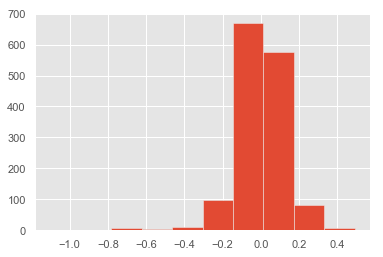

In [1026]:
## Run a basic OLS to check what the model looks like

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(houseFeatures2, saleprice)
residuals = saleprice - lm.predict(houseFeatures2)
plt.hist(residuals)

In [769]:
from sklearn.metrics import mean_squared_error
from math import sqrt

OLS_mse = (mean_squared_error(saleprice, lm.predict(houseFeatures2)))

OLS_rmse = np.sqrt(mean_squared_error(saleprice, lm.predict(houseFeatures2)))

print('OLS_R^2 is equal to %.3f' %(lm.score(houseFeatures2, saleprice)))
print('OLS_RSS is equal to %.3f' %(np.sum((saleprice-lm.predict(houseFeatures2))**2)))
print('OLS_RMSE is equal to %.3f' % (np.sqrt(mean_squared_error(saleprice, lm.predict(houseFeatures2)))))
print('The OLS_intercept is %.3f' %(lm.intercept_))
print('The OLS_slopes are %s' %(lm.coef_))

OLS_R^2 is equal to 0.890
OLS_RSS is equal to 25.639
OLS_RMSE is equal to 0.133
The OLS_intercept is 8.041
The OLS_slopes are [ 8.71500378e-02  1.08168277e-01  1.55892486e-01  2.31959741e-01
  3.23876091e-01  3.55515146e-02  3.48840987e-02  3.16622630e-02
  1.80599325e-01  7.12919068e-02  1.93112441e-01  2.33433562e-03
  5.66285415e-02 -1.14160740e-01 -7.29386075e-02  5.09752589e-02
  6.26161350e-02  8.28331939e-02  6.24311386e-02  1.60221895e-01
  1.98998695e-01 -2.18252276e-02  3.08308174e-02  5.18335725e-02
  7.93337571e-02  1.44446732e-01  2.17410763e-01  9.94621259e-02
  2.22585089e-01 -9.75942048e-02 -1.14445180e-01 -1.58003362e-01
  9.01079273e-03  4.63428945e-02  1.26007477e-01  1.28716482e-15
  1.08921509e-01 -1.90904132e-03  7.24965681e-02 -1.69047099e-02
  9.06031223e-02  1.06631575e-01  6.68984586e-03  4.00084138e-02
 -2.55268571e-02 -6.00952770e-02 -2.17555517e-02  7.23482378e-02
  7.33606960e-02  1.85787815e-01  3.00077679e-02  1.12280527e-01
  3.34197082e-02  5.90246303e

In [358]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(houseFeatures2.values, i) for i in range(houseFeatures2.shape[1])]
vif["features"] = houseFeatures2.columns
#vif.round(1)

C:\Users\aparn\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


<b/> Run the OLS using the Stats Model Package to get the Anova table. <b>
    
<b/> Check the SEs later (they are very large) <b>    

In [359]:
## Run the OLS using the stats model package in order to get the ANOVA table

import statsmodels.api as sm
x = sm.add_constant(houseFeatures2)
# Notice that the dependent variable (y) comes before the independent variables (x)
# Use df.columns.values to get all the column names
model = sm.OLS(saleprice, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Lsaleprice   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     156.0
Date:                Sat, 24 Aug 2019   Prob (F-statistic):               0.00
Time:                        07:40:06   Log-Likelihood:                 899.46
No. Observations:                1460   AIC:                            -1649.
Df Residuals:                    1385   BIC:                            -1252.
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.0582      0.215     37.559   

C:\Users\aparn\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [ ]:
pValues = results.pvalues
print('The significant coefficients')
pValues[pValues<0.05]

## Most variables are significant, but a whole bunch would also have serious multicollinearity. 

## Ridge
<b/> Run the Ridge Regression <b>

In [361]:
## Import all relevant modules

from sklearn import linear_model
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
lasso = Lasso()
net   = ElasticNet()

In [546]:
## Run a ridge regression using GridSearchCV

# Create the hyperparameter grid
alphaRange = np.linspace(1e-3,200,20)
param_grid = {'alpha': alphaRange}

parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(lasso,param_grid,scoring='neg_mean_squared_error', cv=10)

#ridge_regressor = GridSearchCV(ridge,param_grid, cv=10)
ridge_regressor.fit(houseFeatures2, saleprice)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

## scoring='neg_mean_squared_error',

{'alpha': 0.001}
-0.0204697393395845


In [362]:
## Train a Ridge regression model using Ridge setting  𝛼=0.001 (based on results above).
## on the houseprice data set and report its  𝑅2

ridge.set_params(alpha=0.001)
ridge.fit(houseFeatures2, saleprice)
ridge.score(houseFeatures2, saleprice)

0.8929009699569428

In [700]:
## Print the intercept and slopes from the ridge regression

coefDF = pd.Series(ridge.coef_, index=houseFeatures2.columns)
print('The intercept is %.4f' %(ridge.intercept_))
print('The slopes are %s' %(coefDF))

In [740]:
## Graph for Ridge penalty -- not working. 

columns = houseFeatures2.columns
df_coef = pd.DataFrame(coef, index=alphaRange, columns=columns)
title = 'Ridge coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show()

## Lasso

<b/>Run the Lasso regression, using GridSearchCV <b>

In [545]:
## Lasso regression using GridSearchCV

# Create the hyperparameter grid
alphaRange = np.linspace(1e-3,200,20)
param_grid = {'alpha': alphaRange}

parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso,param_grid,scoring='neg_mean_squared_error', cv=10)

#lasso_regressor = GridSearchCV(lasso,param_grid, cv=10)

lasso_regressor.fit(houseFeatures2, saleprice)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.001}
-0.0204697393395845


In [369]:
## Run the Lasso with the alpha specified above
lasso.set_params(alpha=0.0001)
lasso.fit(houseFeatures2, saleprice)
lasso.score(houseFeatures2, saleprice)

0.8918712819955027

In [371]:
## Print the intercept and slopes from the lasso regression
lasso_coef = pd.Series(lasso.coef_, index=houseFeatures2.columns)
print('The intercept is %.4f' %(lasso.intercept_))
print('The slopes are %s' %(lasso_coef))
print('The R^2 is %s' %(lasso.score(houseFeatures2,saleprice)))

In [373]:
sortedCoefs = np.abs(lasso_coef).sort_values(ascending=False)
sortedCoefs

## Train-Test-Split and K-Fold CV

**First run it on the OLS**

In [547]:
## Do the OLS, Ridge and Lasso using train-test-split on the training dataset.

import sklearn.model_selection as ms

train_error = []
test_error = []
train_score = []
test_score = []

x_train, x_test, y_train, y_test = ms.train_test_split(houseFeatures2, saleprice, 
                                                       test_size=1.0/3, random_state=0)

print('Original: {}, {}'.format(houseFeatures2.shape, saleprice.shape))
print('Training: {}, {}'.format(x_train.shape, y_train.shape))
print('Test: {}, {}'.format(x_test.shape, y_test.shape))

Original: (1460, 79), (1460,)
Training: (973, 79), (973,)
Test: (487, 79), (487,)


In [548]:
lm.fit(x_train, y_train)
train_error.append(1-lm.score(x_train, y_train))
test_error.append(1-lm.score(x_test, y_test))    
train_score.append(lm.score(x_train, y_train))
test_score.append(lm.score(x_train, y_train))

In [377]:
train_error
test_error

[0.10225331872484922]

In [550]:
train_score
test_score

[0.8977466812751508]

In [771]:
y_pred = lm.predict(x_test)

OLS_test_mse = (mean_squared_error(y_test, y_pred))
print("OLS Test Mean Squared Error: {}".format(test_mse))

OLS_test_rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("OLS Test Root Mean Squared Error: {}".format(test_rmse))

OLS Test Mean Squared Error: 0.016740326037074704
OLS Test Root Mean Squared Error: 0.12938441187822705


In [559]:
## Do a 10-fold cross-validation on saleprice and houseFeatures2

scores = ms.cross_val_score(estimator=lm, X=houseFeatures2, y=saleprice, cv=10)

print('Scores: {}'.format(scores))
print('Score mean: {}'.format(scores.mean()))
print('Score std deviation: {}'.format(scores.std()))

Scores: [0.87395924 0.90882291 0.91321159 0.82378162 0.88438503 0.89452043
 0.85084611 0.89630299 0.83208067 0.88092248]
Score mean: 0.8758833052254724
Score std deviation: 0.029332944071569965


In [774]:
## Do a 10 fold cross-validation on training data:

#scores = ms.cross_val_score(estimator=lm, X=x_train, y=y_train, cv=10, scoring='neg_mean_squared_error')

scores = ms.cross_val_score(estimator=lm, X=x_train, y=y_train, cv=10)

print('Scores: {}'.format(scores))
print('Score mean: {}'.format(scores.mean()))
print('Score std deviation: {}'.format(scores.std()))

#y_pred = scores.predict(x_test)
#mse = mean_squared_error(y_test, y_pred)
#print("Mean Squared Error: {}".format(mse))

Scores: [0.86045313 0.81178709 0.86928116 0.86559347 0.89513551 0.87676699
 0.91617262 0.89447231 0.88656448 0.86240376]
Score mean: 0.8738630515349592
Score std deviation: 0.026629051546832375


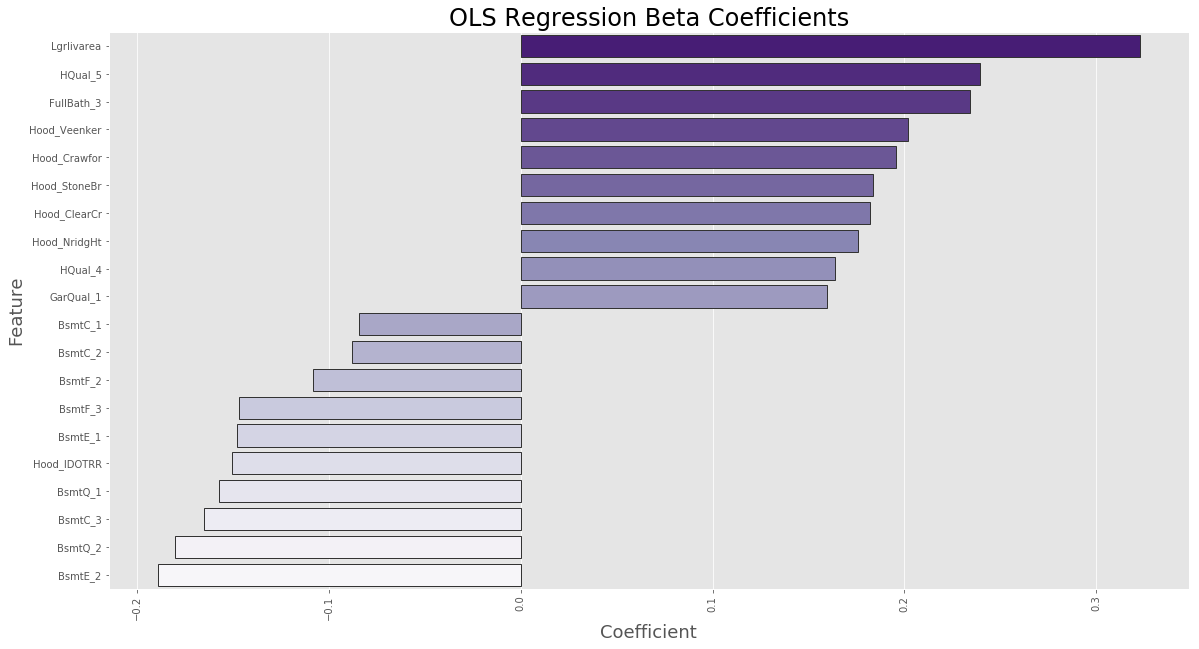

In [618]:
#Create series of coefficient values -- graph

coef = pd.Series(lm.coef_, index = x_train.columns).sort_values(ascending=False)
big_coef = coef.head(10).to_frame()
small_coef = coef.tail(10).to_frame()
coef = pd.concat([big_coef, small_coef])
coef.columns = ['Coefficient']

#Create the graph of coefficient size
plt.subplots(figsize=(16, 9))
plt.title('OLS Regression Beta Coefficients',fontsize=24)
plt.xlabel('Size of Coefficient', fontsize=18)
plt.ylabel('Feature', fontsize=18)
plt.xticks(rotation=90)
plt.tight_layout()
sns.barplot(x='Coefficient', y=coef.index, data=coef, palette='Purples_r', linewidth=1.0, edgecolor=".2")

In [782]:
# Predict SalePrice for both training and validation data 

y_train_pred = lm.predict(x_train)
y_test_pred = lm.predict(x_test)

OLS_10_r2 = lm.score(x_test, y_test)
OLS_Test_10_mse = mean_squared_error(y_test, y_test_pred)
OLS_Test_10_rmse = np.sqrt(mse)

print("OLS Test 10-F CV Mean Squared Error: {}".format(OLS_Test_10_mse))
print("OLS Test 10-F CV Root Mean Squared Error: {}".format(OLS_Test_10_rmse))
print("OLS Test 10-F CV R^2: {}".format(OLS_10_r2))


# print("RMSE on Training set :", rmsle(y_train.values, y_train_pred).mean())
# print("RMSE on Validation set :", rmsle(y_test.values, y_test_pred).mean())

OLS Test 10-F CV Mean Squared Error: 0.016740326037074704
OLS Test 10-F CV Root Mean Squared Error: 0.12938441187822705
OLS Test 10-F CV R^2: 0.8889304190096317


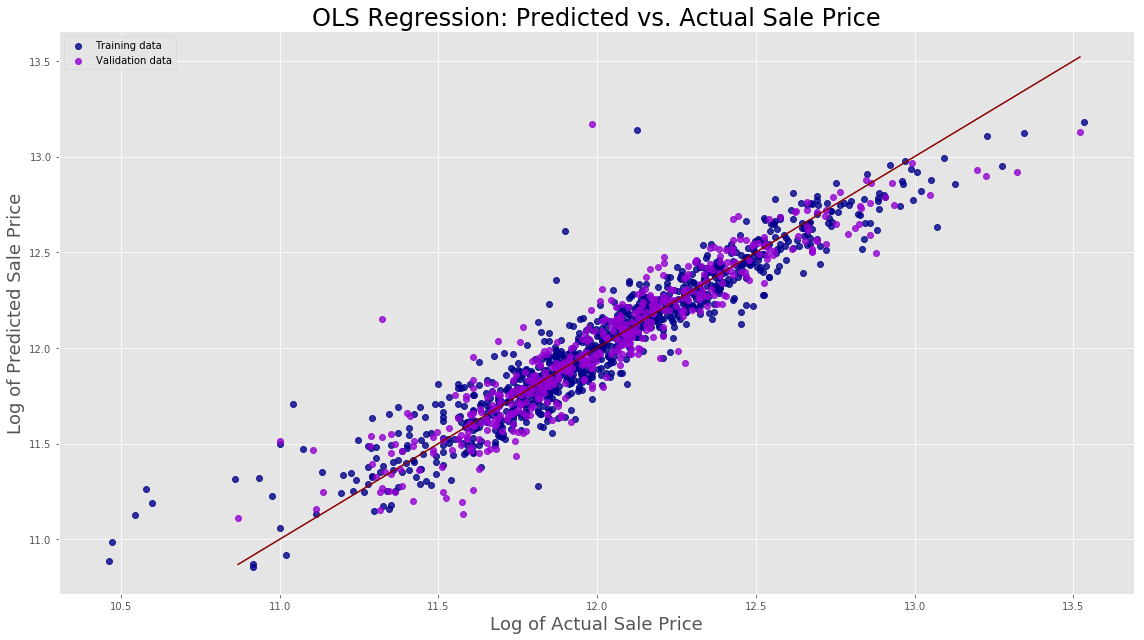

In [620]:
plt.figure(figsize=(16, 9))

# Overlay the scatter plots
sns.regplot(x=y_train, y=y_train_pred, fit_reg=False, color = 'darkblue', label = "Training data")
sns.regplot(x=y_test, y=y_test_pred, fit_reg=False, color = 'darkviolet', label = "Validation data")

# Create the titles
plt.title('OLS Regression: Predicted vs. Actual Sale Price', fontsize=24)
plt.xlabel('Log of Actual Sale Price', fontsize=18)
plt.ylabel('Log of Predicted Sale Price', fontsize=18)
plt.legend(loc = "upper left")

# Create the line of prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'darkred')
plt.tight_layout()

**GridSearchCV for Ridge and Lasso using train-test data**

**RIDGE**

In [780]:
## Ridge using GridSearchCV on train-test data

from sklearn.metrics import mean_squared_error

# Create the hyperparameter grid
alphaRange = np.linspace(1e-3,200,20)
param_grid = {'alpha': alphaRange}

# Setup the GridSearchCV object: ridge_regressor
ridge_regressor = GridSearchCV(ridge,param_grid, cv=10)

# Fit it to the training data
ridge_regressor.fit(x_train, y_train)

# Predict on the test set and compute metrics
y_pred = ridge_regressor.predict(x_test)
ridge_10_r2 = ridge_regressor.score(x_test, y_test)
ridge_10_mse = mean_squared_error(y_test, y_pred)
ridge_10_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Tuned Ridge 10-F CV best lambda: {}".format(ridge_regressor.best_params_))
print("Tuned Ridge 10-F CV R squared: {}".format(r2))
print("Tuned Ridge 10-F CV MSE: {}".format(mse))
print("Tuned Ridge 10-F CV RMSE: {}".format(rmse))

Tuned Ridge 10-F CV best lambda: {'alpha': 0.001}
Tuned Ridge 10-F CV R squared: 0.8705857898889647
Tuned Ridge 10-F CV MSE: 0.016740326037074704
Tuned Ridge 10-F CV RMSE: 0.12938441187822705


In [693]:
ridge.set_params(alpha=0.001)
ridge.fit(x_train, y_train)
ridge.score(x_train, y_train)

0.8977466763397063

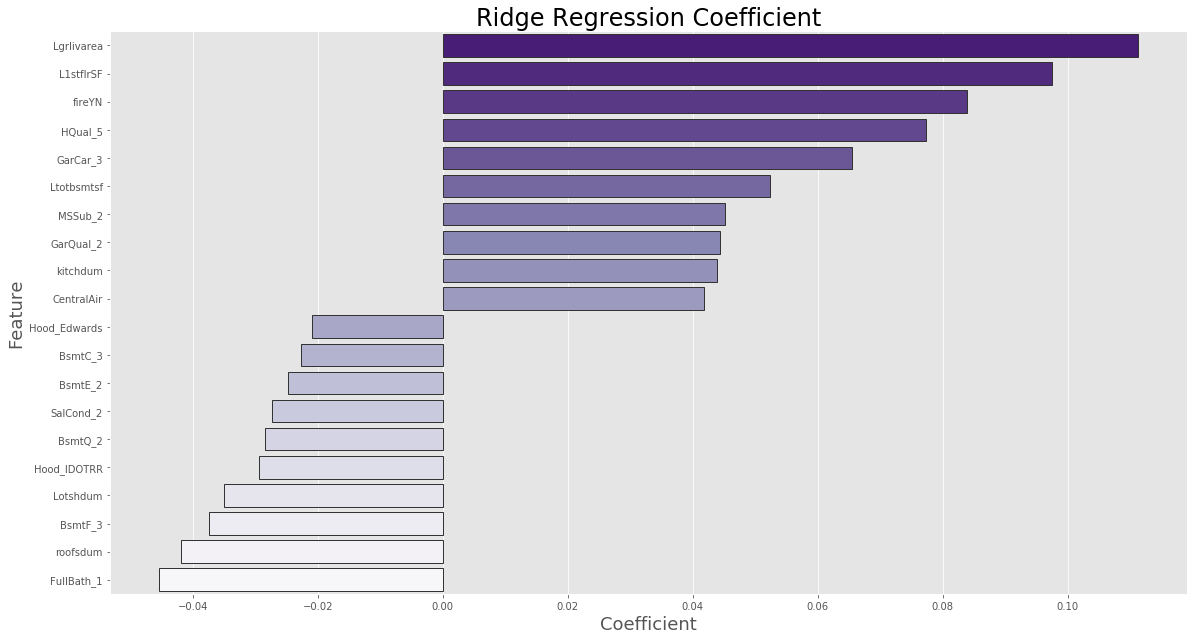

In [621]:
# Locate the largest positive and negative coefficients

coef = pd.Series(ridge.coef_, index = x_train.columns).sort_values(ascending=False)
big_coef = coef.head(10).to_frame()
small_coef = coef.tail(10).to_frame()
coef = pd.concat([big_coef, small_coef])
coef.columns = ['Coefficient']

plt.figure(figsize=(16, 9))
plt.title('Ridge Regression Coefficient', fontsize=24)
plt.xlabel('Size of Coefficent', fontsize=18)
plt.ylabel('Feature', fontsize=18)

plt.tight_layout()
sns.barplot(x='Coefficient', y=coef.index, data=coef, palette='Purples_r', linewidth=1.0, edgecolor=".2")

In [684]:
# Predicting the SalePrice for our training and test sets

y_train_rdg = ridge_regressor.predict(x_train)
y_test_rdg = ridge_regressor.predict(x_test)

# print("RMSE on Training set :", rmsle(y_train.values, y_train_rdg).mean())
# print("RMSE on Validation set :", rmsle(y_test.values, y_test_rdg).mean())

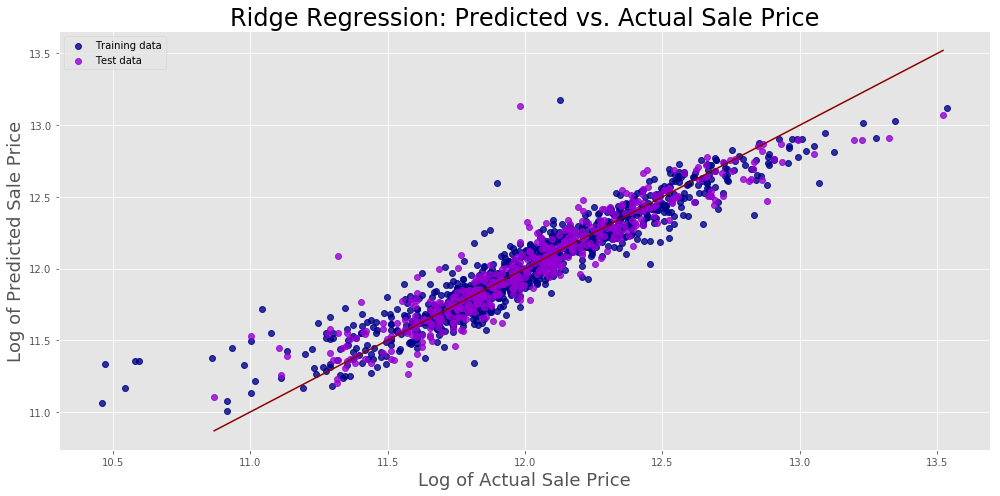

In [685]:
plt.figure(figsize=(14, 7))
sns.regplot(x=y_train, y=y_train_rdg, fit_reg=False, color = 'darkblue', label = "Training data")
sns.regplot(x=y_test, y=y_test_rdg, fit_reg=False, color = 'darkviolet', label = "Test data")

plt.title('Ridge Regression: Predicted vs. Actual Sale Price', fontsize=24)
plt.xlabel('Log of Actual Sale Price', fontsize=18)
plt.ylabel('Log of Predicted Sale Price', fontsize=18)
plt.legend(loc = "upper left")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'darkred')
plt.tight_layout()

**LASSO**

In [784]:
## Lasso using GridSearchCV on train-test data

from sklearn.metrics import mean_squared_error

# Create the hyperparameter grid
alphaRange = np.linspace(1e-3,200,20)
param_grid = {'alpha': alphaRange}

# Setup the GridSearchCV object: lasso_regressor
lasso_regressor = GridSearchCV(lasso, param_grid, cv=10)

# Fit it to the training data
lasso_regressor.fit(x_train, y_train)

# Predict on the test set and compute metrics
y_pred = lasso_regressor.predict(x_test)
lasso_10_r2 = lasso_regressor.score(x_test, y_test)
lasso_10_mse = mean_squared_error(y_test, y_pred)
lasso_10_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Tuned Lasso best lambda: {}".format(lasso_regressor.best_params_))
print("Tuned Lasso R squared: {}".format(lasso_10_r2))
print("Tuned Lasso MSE: {}".format(lasso_10_mse))
print("Tuned Lasso RMSE: {}".format(lasso_10_rmse))

Tuned Lasso best lambda: {'alpha': 0.001}
Tuned Lasso R squared: 0.821144415486029
Tuned Lasso MSE: 0.026956982925640874
Tuned Lasso RMSE: 0.16418581828416506


In [694]:
## Set up a lasso regression with the alpha identified by the GridSearchCV

lasso.set_params(alpha=0.001)
lasso.fit(x_train, y_train)
lasso.score(x_train, y_train)

0.8216269842852849

In [697]:
## majority of the coefficients have been zeroed out by Lasso

lassoCoef = pd.Series(lasso.coef_, index=x_train.columns)
sortedCoefs = np.abs(lassoCoef).sort_values(ascending=False)
sortedCoefs

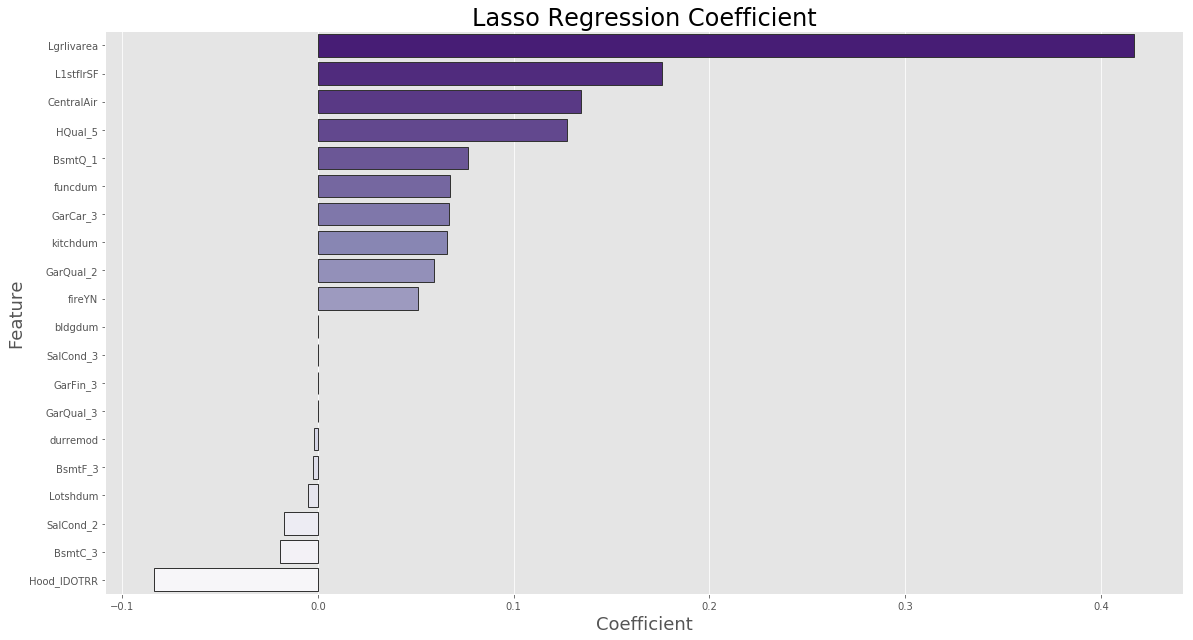

In [695]:
# Locate the largest positive and negative coefficients

coef = pd.Series(lasso.coef_, index = x_train.columns).sort_values(ascending=False)
big_coef = coef.head(10).to_frame()
small_coef = coef.tail(10).to_frame()
coef = pd.concat([big_coef, small_coef])
coef.columns = ['Coefficient']

plt.figure(figsize=(16, 9))
plt.title('Lasso Regression Coefficient', fontsize=24)
plt.xlabel('Size of Coefficent', fontsize=18)
plt.ylabel('Feature', fontsize=18)

plt.tight_layout()
sns.barplot(x='Coefficient', y=coef.index, data=coef, palette='Purples_r', linewidth=1.0, edgecolor=".2")

In [682]:
##Prediction for lasso

y_train_las = lasso_regressor.predict(x_train)
y_test_las = lasso_regressor.predict(x_test)

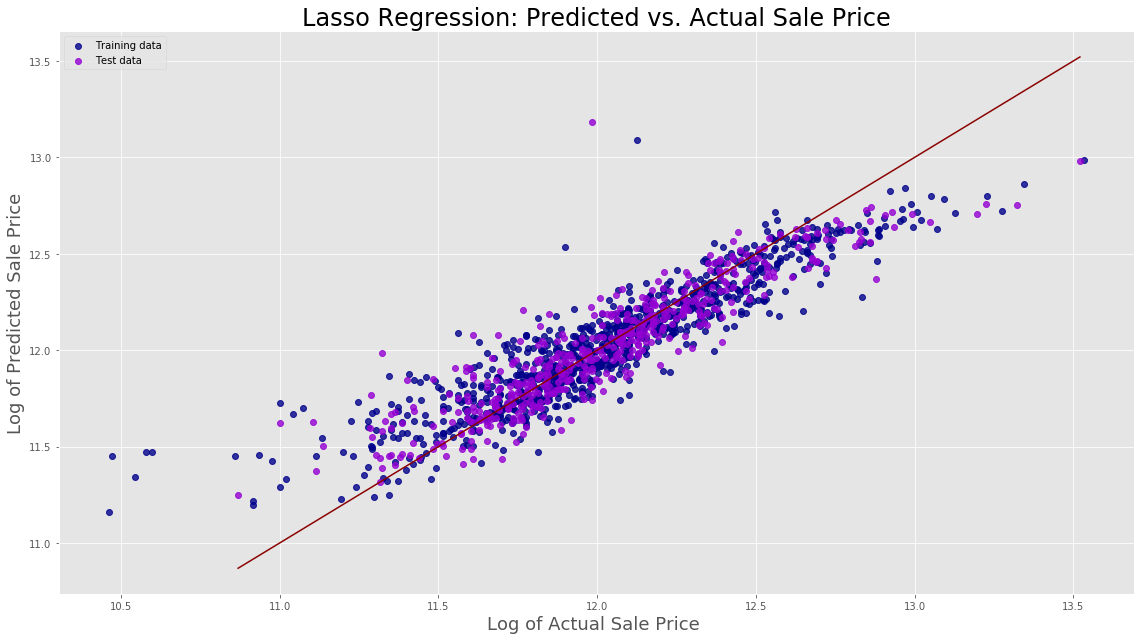

In [683]:
## Prediction for lasso -- graph

plt.figure(figsize=(16, 9))
sns.regplot(x=y_train, y=y_train_las, fit_reg=False, color = 'darkblue', label = "Training data")
sns.regplot(x=y_test, y=y_test_las, fit_reg=False, color = 'darkviolet', label = "Test data")
 
plt.title('Lasso Regression: Predicted vs. Actual Sale Price', fontsize=24)
plt.xlabel('Log of Actual Sale Price ', fontsize=18)
plt.ylabel('Log of Predicted Sale Price', fontsize=18)
plt.legend(loc = "upper left")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'darkred')
plt.tight_layout()

## Elastic-Net

In [785]:
## Elastic Net using GridSearchCV

from sklearn.metrics import mean_squared_error

# Create the hyperparameter grid
l1_space = np.linspace (1e-3,200,20) #(0, 1, 30),
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=10)

# Fit it to the training data
gm_cv.fit(x_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(x_test)
enet_10_r2 = gm_cv.score(x_test, y_test)
enet_10_mse = mean_squared_error(y_test, y_pred)
enet_10_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(enet_10_r2))
print("Tuned ElasticNet MSE: {}".format(enet_10_mse))
print("Tuned ElasticNet RMSE: {}".format(enet_10_rmse))


Tuned ElasticNet l1 ratio: {'l1_ratio': 0.001}
Tuned ElasticNet R squared: 0.6625024046295704
Tuned ElasticNet MSE: 0.05086739080900685
Tuned ElasticNet RMSE: 0.22553800302611277


In [747]:
##Prediction for Elastic Net

y_train_net = gm_cv.predict(x_train)
y_test_net = gm_cv.predict(x_test)

# print("Lasso RMSE on Training set :", rmsle(y_train, y_train_las).mean())
# print("Lasso RMSE on Validation set :", rmsle(y_test, y_test_las).mean())

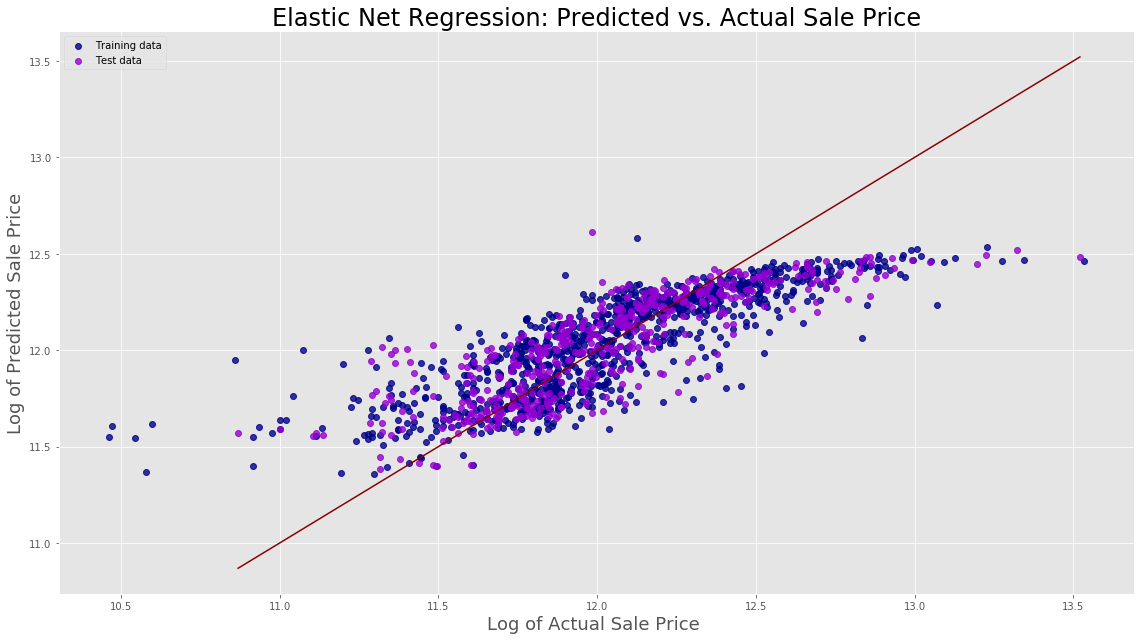

In [748]:
## Prediction for Elastic Net -- graph

plt.figure(figsize=(16, 9))
sns.regplot(x=y_train, y=y_train_net, fit_reg=False, color = 'darkblue', label = "Training data")
sns.regplot(x=y_test, y=y_test_net, fit_reg=False, color = 'darkviolet', label = "Test data")
 
plt.title('Elastic Net Regression: Predicted vs. Actual Sale Price', fontsize=24)
plt.xlabel('Log of Actual Sale Price ', fontsize=18)
plt.ylabel('Log of Predicted Sale Price', fontsize=18)
plt.legend(loc = "upper left")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'darkred')
plt.tight_layout()

**Run a train-test-split Ridge and Lasso without the 10 fold CV**

In [594]:
# Do it on Ridge regression

train_R2 = []
test_R2  = []
alphaRange = np.linspace(0.001,200,20)
for alpha in alphaRange:
        ridge.set_params(alpha=alpha, normalize=False)  
        ridge.fit(x_train, y_train)
        train_R2.append(ridge.score(x_train, y_train))
        test_R2.append(ridge.score(x_test, y_test))

In [749]:
train_R2
test_R2

In [750]:
# Predict on the test set and compute metrics
y_pred = ridge.predict(x_test)
r2 = ridge.score(x_test, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

#print("Ridge alpha without 10 fold CV : {}".format(ridge.best_params_)) -- this doesn't work given the code above.
print("Ridge R squared without 10 fold CV : {}".format(r2))
print("Ridge MSE without 10 fold CV : {}".format(mse))
print("Ridge RMSE without 10 fold CV : {}".format(rmse))

Ridge R squared without 10 fold CV : 0.8705857898889647
Ridge MSE without 10 fold CV : 0.01950521512525638
Ridge RMSE without 10 fold CV : 0.13966107233318947


In [688]:
## train-test-split on Lasso
train_R2 = []
test_R2  = []
alphaRange = np.linspace(1e-3,2,20)
for alpha in alphaRange:
    lasso.set_params(alpha=alpha, normalize=True, max_iter=2000) 
    lasso.fit(x_train, y_train)
    train_R2.append(lasso.score(x_train, y_train))
    test_R2.append(lasso.score(x_test, y_test))

In [751]:
train_R2
test_R2

In [752]:
# Predict on the test set and compute metrics
y_pred = lasso.predict(x_test)
r2 = lasso.score(x_test, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

#print("Lasso alpha without 10 fold CV : {}".format(ridge.best_params_)) -- this doesn't work given the code above.
print("Lasso R squared without 10 fold CV : {}".format(r2))
print("Lasso MSE without 10 fold CV : {}".format(mse))
print("Lasso RMSE without 10 fold CV : {}".format(rmse))

Lasso R squared without 10 fold CV : 0.821144415486029
Lasso MSE without 10 fold CV : 0.026956982925640874
Lasso RMSE without 10 fold CV : 0.16418581828416506


## Gradient Boosting Regression

In [659]:
import sklearn.ensemble
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
gbm = GradientBoostingRegressor()

In [660]:
gbm.fit(houseFeatures2,saleprice)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [661]:
# R^2 of the fit
gbm.score(houseFeatures2,saleprice)

0.93175014041737

In [664]:
gbm.set_params(learning_rate=0.01, n_estimators=500, verbose=1, subsample=0.7, 
               warm_start=False, loss='ls', max_depth=2, max_features=2, min_impurity_decrease=0.01)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=2, max_features=2,
             max_leaf_nodes=None, min_impurity_decrease=0.01,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=0.7, tol=0.0001,
             validation_fraction=0.1, verbose=1, warm_start=False)

In [665]:
# We see some over-fitting 
gbm.fit(x_train, y_train)
print('-'*50)
print("The train set R^2 is %.3f" %(gbm.score(x_train, y_train)))
print("The test set R^2 is %.3f" %(gbm.score(x_test,y_test)))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.1633           0.0010            1.50s
         2           0.1552           0.0009            1.25s
         3           0.1638           0.0011            1.16s
         4           0.1626           0.0005            0.99s
         5           0.1575           0.0009            0.99s
         6           0.1643           0.0010            0.91s
         7           0.1551           0.0009            0.85s
         8           0.1522           0.0012            0.80s
         9           0.1546           0.0010            0.76s
        10           0.1519           0.0008            0.74s
        20           0.1499           0.0003            0.55s
        30           0.1368           0.0008            0.47s
        40           0.1299           0.0008            0.41s
        50           0.1306           0.0008            0.39s
        60           0.1201           0.0006            0.35s
       

In [753]:
y_pred = gbm.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("GBM MSE: {}".format(mse))
print("GBM RMSE: {}".format(rmse))

GBM MSE: 0.0180063006716027
GBM RMSE: 0.13418755781220068


In [687]:
# Locate the largest positive and negative coefficients -- Not working. Likely not suited to GBM

#coef = pd.Series(gbm.coef_, index = x_train.columns).sort_values(ascending=False)
# big_coef = coef.head(10).to_frame()
# small_coef = coef.tail(10).to_frame()
# coef = pd.concat([big_coef, small_coef])
# coef.columns = ['Coefficient']

#plt.figure(figsize=(20, 50))
#plt.title('GBM Regression Coefficient', fontsize=24)
#plt.xlabel('Feature', fontsize=18)
#plt.ylabel('Importance Score', fontsize=18)

#plt.tight_layout()

# sns.barplot(x='Coefficient', y=coef.index, data=coef, palette='Purples_r', linewidth=1.0, edgecolor=".2")

In [667]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [668]:
from sklearn import tree

import graphviz
def GenTreeData(treeNum):
            if treeNum >= gbm.n_estimators: raise ValueError('treeNum out of bound')
            tree.export_graphviz(gbm.estimators_[treeNum,0], out_file='temp.dot')
            with open("temp.dot") as f:
                    return f.read()

In [413]:
#graphviz.Source(GenTreeData(10))

In [669]:
## Change the parameters from code provided earlier. Now n_estimatros is 5000

gbm.set_params(learning_rate=0.01, n_estimators=5000, max_depth=2, max_features=2, subsample=1.0, warm_start=False)
gbm.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.1628            4.98s
         2           0.1620            4.99s
         3           0.1616            5.00s
         4           0.1604            6.24s
         5           0.1591            6.00s
         6           0.1576            5.82s
         7           0.1567            5.71s
         8           0.1555            5.62s
         9           0.1545            5.55s
        10           0.1534            5.99s
        20           0.1469            3.99s
        30           0.1413            3.32s
        40           0.1354            2.98s
        50           0.1297            2.78s
        60           0.1231            2.63s
        70           0.1176            2.47s
        80           0.1114            2.40s
        90           0.1053            2.35s
       100           0.1003            2.35s
       200           0.0700            1.92s
       300           0.0517            1.69s
       40

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=2, max_features=2,
             max_leaf_nodes=None, min_impurity_decrease=0.01,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=5000, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=1, warm_start=False)

In [670]:
# We see some over-fitting 
gbm.fit(x_train, y_train)
print('-'*50)
print("The train set R^2 is %.3f" %(gbm.score(x_train, y_train)))
print("The test set R^2 is %.3f" %(gbm.score(x_test,y_test)))

      Iter       Train Loss   Remaining Time 
         1           0.1628            4.99s
         2           0.1623            5.00s
         3           0.1618            5.00s
         4           0.1614            5.00s
         5           0.1610            5.00s
         6           0.1607            5.83s
         7           0.1599            5.71s
         8           0.1596            5.62s
         9           0.1588            5.55s
        10           0.1587            5.49s
        20           0.1510            3.99s
        30           0.1434            3.31s
        40           0.1372            2.98s
        50           0.1310            2.77s
        60           0.1260            2.55s
        70           0.1206            2.40s
        80           0.1141            2.34s
        90           0.1086            2.29s
       100           0.1038            2.21s
       200           0.0706            1.78s
       300           0.0537            1.55s
       40

In [754]:
y_pred = gbm.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("GBM MSE: {}".format(mse))
print("GBM RMSE: {}".format(rmse))

GBM MSE: 0.0180063006716027
GBM RMSE: 0.13418755781220068


In [698]:
sorted_importance = sorted(zip(houseFeatures2, gbm.feature_importances_), key=lambda t:t[1], reverse=True)
#sorted_importance

Text(0.5, 1.0, 'Feature Importance Plot of 5000-Tree GBM')

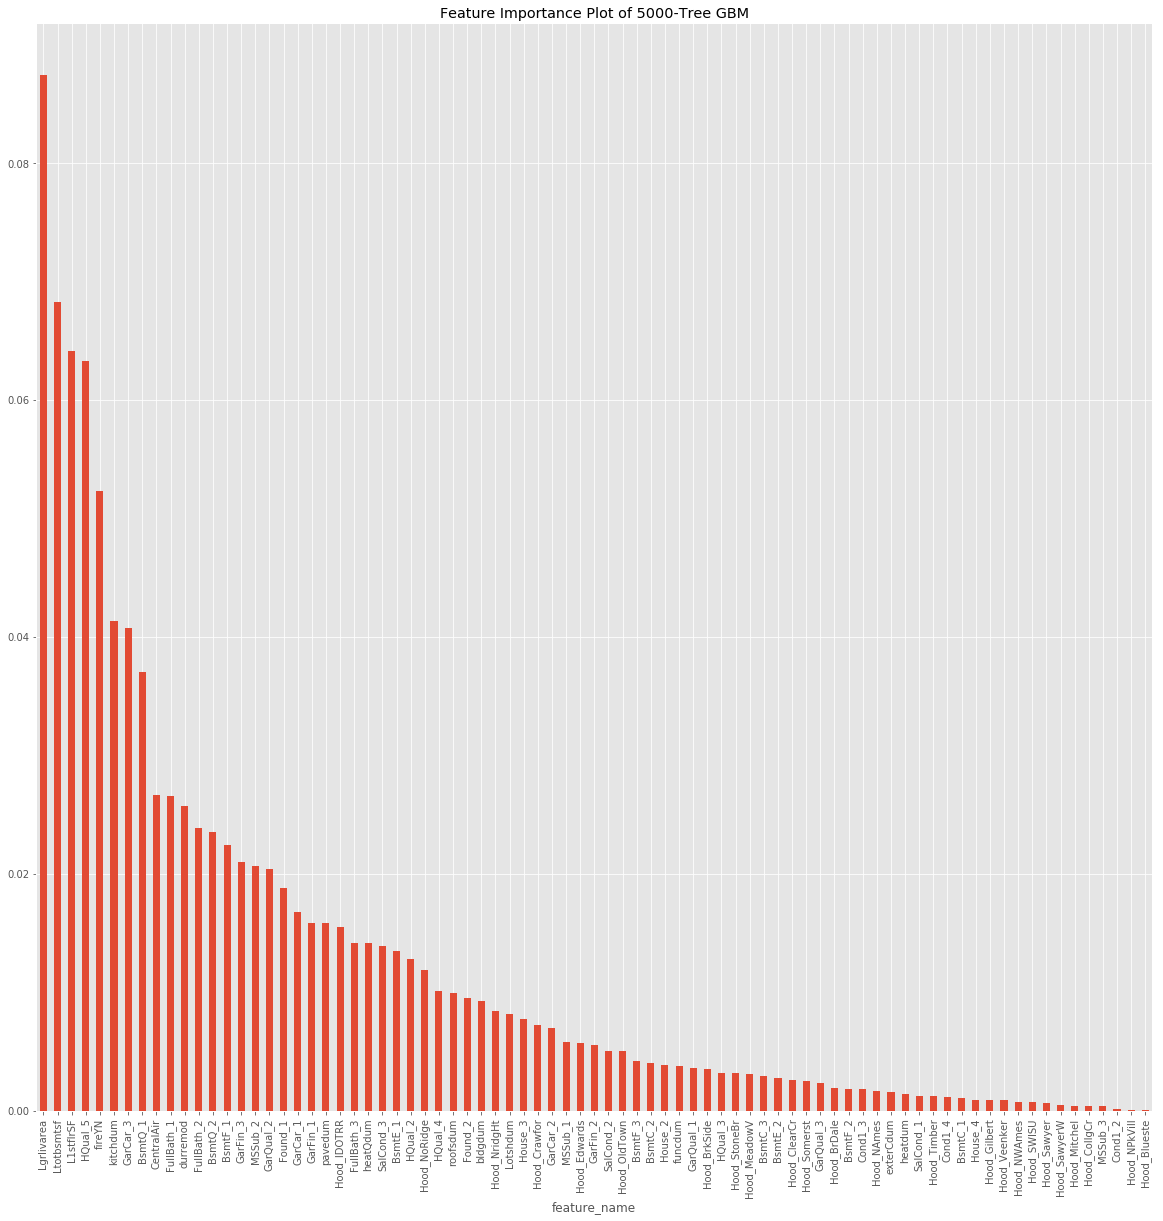

In [673]:
a, b = zip(*sorted_importance) # this splits the list of tuples into two lists
pd.DataFrame({'feature_name':a, 'importance_score':b}).plot.bar(x='feature_name',y='importance_score', legend=None)
plt.rcParams['figure.figsize'] = (20,50)
#plt.figsize=(50,50)
plt.title('Feature Importance Plot of 5000-Tree GBM')


## Alternative way of doing it with Seaborn -- not quite right since too many groups.

# a, b = zip(*sorted_importance) # this splits the list of tuples into two lists
# HF_import = pd.DataFrame({'Feature':a, 'Importance Score':b})

# plt.rcParams['figure.figsize'] = (20,20)
# plt.title('Feature Importance Plot of 5000-Tree GBM')
# sns.barplot(x="Feature", y="Importance Score", data=HF_import, palette='Purples_r', linewidth=1.0, edgecolor=".2")
# plt.tight_layout()

In [675]:
from copy import deepcopy

gbm_models   = []
warm_start   = False
steps        = list(range(1,501,50))

for n_estimators in steps:
                gbm.set_params(n_estimators=n_estimators, learning_rate=0.1, warm_start=warm_start)
                gbm_models.append(deepcopy(gbm.fit(x_train, y_train))) 
                warm_start = True

      Iter       Train Loss   Remaining Time 
         1           0.1583            0.00s
      Iter       Train Loss   Remaining Time 
         2           0.1478            0.05s
         3           0.1408            0.05s
         4           0.1392            0.05s
         5           0.1283            0.05s
         6           0.1210            0.04s
         7           0.1141            0.04s
         8           0.1055            0.04s
         9           0.0971            0.04s
        10           0.0929            0.04s
        11           0.0877            0.04s
        21           0.0666            0.02s
        31           0.0528            0.01s
        41           0.0421            0.01s
        51           0.0369            0.00s
      Iter       Train Loss   Remaining Time 
        52           0.0362            0.00s
        53           0.0359            0.05s
        54           0.0354            0.05s
        55           0.0347            0.05s
       

In [676]:
house_importance = pd.DataFrame([model.feature_importances_ for model in gbm_models], index=steps, columns=x_train.columns)
house_importance

,HQual_2,HQual_3,HQual_4,HQual_5,Lgrlivarea,Hood_Blueste,Hood_BrDale,Hood_BrkSide,Hood_ClearCr,Hood_CollgCr,...,BsmtC_2,BsmtC_3,GarQual_1,GarQual_2,GarQual_3,GarFin_1,GarFin_2,GarFin_3,BsmtQ_1,BsmtQ_2
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.112398,0.000000,0.000000,0.000000,0.000000,0.000000
51,0.008619,0.000379,0.007085,0.032498,0.144671,0.0,0.000000,0.003019,0.000681,0.000044,...,0.001856,0.012644,0.000000,0.012238,0.004912,0.008679,0.001600,0.002032,0.064314,0.005381
101,0.008875,0.000347,0.006770,0.034417,0.144500,0.0,0.000291,0.002939,0.001578,0.000159,...,0.001999,0.011853,0.002339,0.013864,0.004492,0.007954,0.001490,0.001933,0.058805,0.005046
151,0.009013,0.000408,0.006643,0.033852,0.144062,0.0,0.000283,0.002890,0.002339,0.000155,...,0.002172,0.011570,0.003348,0.013486,0.004457,0.007737,0.001472,0.001982,0.057577,0.005432
201,0.009079,0.000422,0.006581,0.033537,0.143165,0.0,0.000279,0.002845,0.002563,0.000153,...,0.002139,0.011393,0.003336,0.013400,0.004653,0.007654,0.001526,0.002147,0.056862,0.005600
251,0.009144,0.000418,0.006550,0.033303,0.144011,0.0,0.000276,0.002928,0.002650,0.000151,...,0.002164,0.011269,0.004011,0.013395,0.004685,0.007572,0.001714,0.002294,0.056246,0.005945
301,0.009242,0.000905,0.006556,0.033124,0.143983,0.0,0.000274,0.002910,0.002634,0.000150,...,0.002172,0.011200,0.004270,0.013341,0.004765,0.007563,0.001752,0.002280,0.055903,0.005936
351,0.009322,0.000900,0.006651,0.032990,0.143560,0.0,0.000272,0.002895,0.002660,0.000149,...,0.002271,0.011143,0.004319,0.013418,0.004829,0.007524,0.001761,0.002268,0.055615,0.005953
401,0.009321,0.000896,0.006733,0.032887,0.143883,0.0,0.000289,0.002884,0.002683,0.000149,...,0.002263,0.011140,0.004327,0.013366,0.004970,0.007495,0.001811,0.002260,0.055421,0.005944
451,0.009380,0.000946,0.006768,0.032753,0.144002,0.0,0.000288,0.002873,0.002672,0.000148,...,0.002294,0.011095,0.004364,0.013418,0.004950,0.007484,0.001822,0.002251,0.055244,0.005935


Text(0, 0.5, 'feature importance')

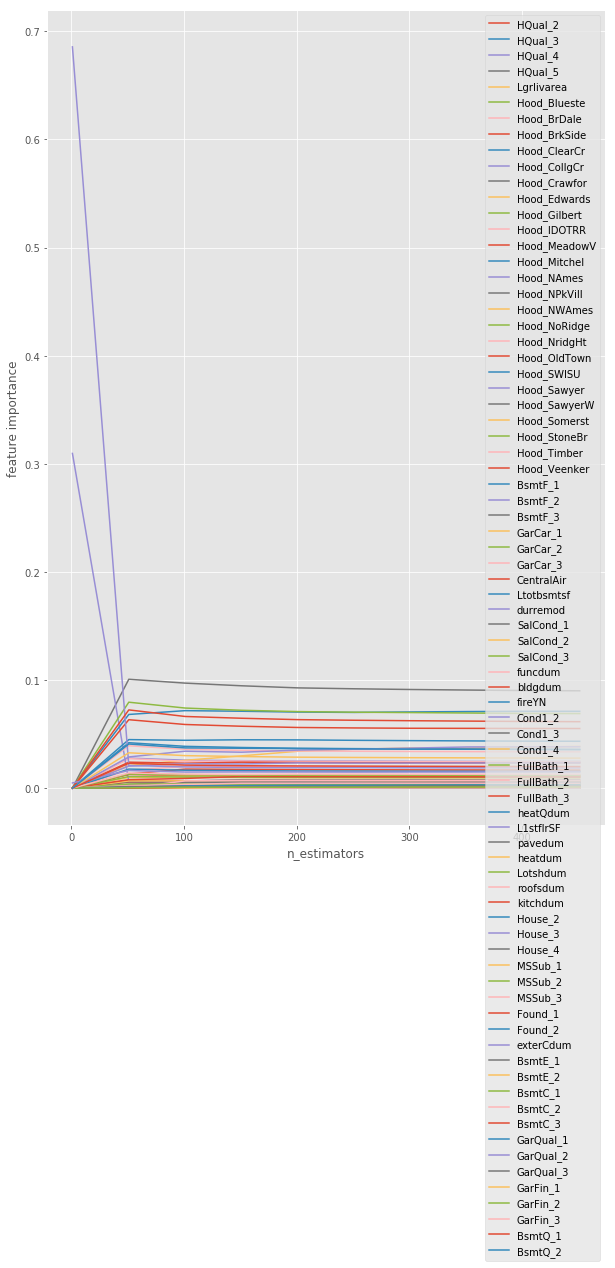

In [429]:
plt.rcParams['figure.figsize'] = (10,15)
for feature in house_importance.columns:
    plt.plot(house_importance.index, house_importance[feature], label=feature)
plt.legend(loc=1)    
plt.xlabel('n_estimators')
plt.ylabel('feature importance')

**10 fold cross-validation on Gradient Boosting Regression**

In [574]:
#estimator = GradientBoostingRegressor()

param_grid={'n_estimators':[5000], 
            'learning_rate': [0.1], # 0.05, 0.02, 0.01], 
            'max_depth':[6],        #4,6], 
            'min_samples_leaf':[3], #,5,9,17], 
            'max_features':[1.0],   #,0.3]#,0.1] 
           } 

n_jobs=4 

#cv = ShuffleSplit(X_train.shape[0], n_iter=10, test_size=0.2)

classifier = GridSearchCV(estimator=gbm, cv=10, param_grid=param_grid, n_jobs=n_jobs)
classifier.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.1367           34.98s
         2           0.1144           37.48s
         3           0.0963           36.64s
         4           0.0811           36.26s
         5           0.0688           36.96s
         6           0.0585           36.65s
         7           0.0499           36.41s
         8           0.0426           36.22s
         9           0.0367           36.62s
        10           0.0318           36.43s
        20           0.0104           36.12s
        30           0.0055           36.12s
        40           0.0041           35.96s
        50           0.0035           35.15s
        60           0.0035           29.89s
        70           0.0035           25.92s
        80           0.0035           22.94s
        90           0.0035           20.68s
       100           0.0035           18.77s
       200           0.0035           10.25s
       300           0.0035            7.50s
       40

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=2, max_features=2,
             max_leaf_nodes=None, min_impurity_decrease=0.01,
             min_impurity_split=None, min_samples_leaf=1,
             min_sample...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=1, warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'n_estimators': [5000], 'learning_rate': [0.1], 'max_depth': [6], 'min_samples_leaf': [3], 'max_features': [1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [575]:
#best parameters
classifier.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'max_features': 1.0,
 'min_samples_leaf': 3,
 'n_estimators': 5000}

In [786]:
## best score
gbm_10_r2 = classifier.best_score_
gbm_10_r2

0.8416138260749035

In [787]:
y_pred = classifier.predict(x_test)

gbm_10_mse = mean_squared_error(y_test, y_pred)
gbm_10_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("GBM 10-fold CV MSE: {}".format(gbm_10_mse))
print("GBM 10-fold CV RMSE: {}".format(gbm_10_rmse))


GBM 10-fold CV MSE: 0.01977278185805815
GBM 10-fold CV RMSE: 0.14061572407827708


In [578]:
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split

# Checking the training model scores
r2_scores = cross_val_score(classifier.best_estimator_, x_train, y_train, cv=10)
mse_scores = cross_val_score(classifier.best_estimator_, x_train, y_train, cv=10,scoring='neg_mean_squared_error')

print("avg R-squared::{:.3f}".format(np.mean(r2_scores)))
print("MSE::{:.3f}".format(np.mean(mse_scores)))

      Iter       Train Loss   Remaining Time 
         1           0.1360           44.97s
         2           0.1139           42.48s
         3           0.0957           43.29s
         4           0.0806           43.70s
         5           0.0681           43.95s
         6           0.0578           48.27s
         7           0.0493           49.93s
         8           0.0422           52.41s
         9           0.0364           52.68s
        10           0.0315           51.39s
        20           0.0100           43.57s
        30           0.0054           42.57s
        40           0.0040           40.55s
        50           0.0034           37.82s
        60           0.0034           31.86s
        70           0.0034           27.68s
        80           0.0034           24.41s
        90           0.0034           21.93s
       100           0.0034           19.94s
       200           0.0034           10.75s
       300           0.0034            7.83s
       40

       500           0.0034            4.57s
       600           0.0034            4.05s
       700           0.0034            3.64s
       800           0.0034            3.32s
       900           0.0034            3.07s
      1000           0.0034            2.85s
      2000           0.0034            1.71s
      3000           0.0034            1.04s
      4000           0.0034            0.49s
      5000           0.0034            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.1392           34.97s
         2           0.1165           32.48s
         3           0.0978           33.30s
         4           0.0822           32.47s
         5           0.0694           32.96s
         6           0.0590           32.46s
         7           0.0501           32.81s
         8           0.0430           32.44s
         9           0.0370           32.72s
        10           0.0321           32.93s
        20           0.0107           32.37s
        3

        30           0.0050           32.31s
        40           0.0035           32.24s
        50           0.0030           30.00s
        60           0.0030           25.28s
        70           0.0030           21.91s
        80           0.0030           19.44s
        90           0.0030           17.46s
       100           0.0030           15.88s
       200           0.0030            8.78s
       300           0.0030            6.41s
       400           0.0030            5.32s
       500           0.0030            4.53s
       600           0.0030            3.99s
       700           0.0030            3.58s
       800           0.0030            3.34s
       900           0.0030            3.10s
      1000           0.0030            2.88s
      2000           0.0030            1.72s
      3000           0.0030            1.05s
      4000           0.0030            0.50s
      5000           0.0030            0.00s
      Iter       Train Loss   Remaining Time 
         

      2000           0.0034            1.68s
      3000           0.0034            1.03s
      4000           0.0034            0.49s
      5000           0.0034            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.1357           29.99s
         2           0.1137           29.99s
         3           0.0955           31.65s
         4           0.0805           32.47s
         5           0.0681           33.00s
         6           0.0578           32.49s
         7           0.0494           32.84s
         8           0.0422           32.47s
         9           0.0363           32.74s
        10           0.0313           32.46s
        20           0.0098           31.87s
        30           0.0051           31.15s
        40           0.0038           30.76s
        50           0.0032           28.71s
        60           0.0032           24.46s
        70           0.0032           21.20s
        80           0.0032           18.76s
        9

In [579]:
print("The train set R^2 is %.3f" %(classifier.score(x_train, y_train)))
print("The test set R^2 is %.3f" %(classifier.score(x_test,y_test)))

train_error = (1 - classifier.score(x_train, y_train))
test_error = (1 - classifier.score(x_test, y_test))

print("The training error is: %.5f" %train_error)
print("The test     error is: %.5f" %test_error)

The train set R^2 is 0.979
The test set R^2 is 0.869
The training error is: 0.02134
The test     error is: 0.13119


In [637]:
##Prediction for GBM

y_train_net = classifier.predict(x_train)
y_test_net = classifier.predict(x_test)

# print("Lasso RMSE on Training set :", rmsle(y_train, y_train_las).mean())
# print("Lasso RMSE on Validation set :", rmsle(y_test, y_test_las).mean())

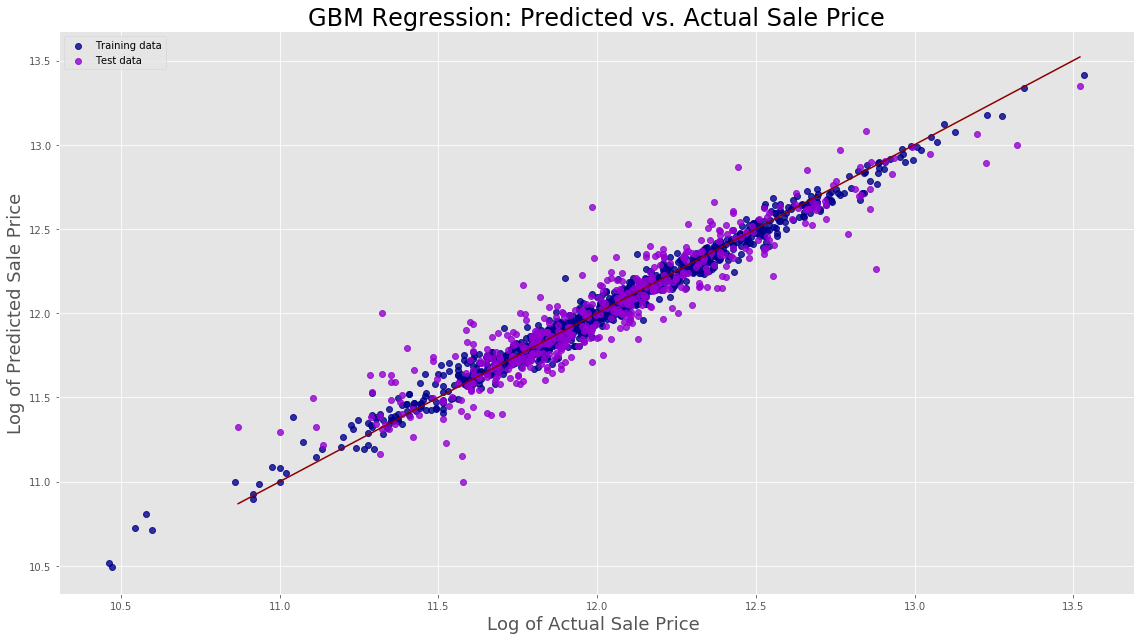

In [638]:
## Prediction for GBM -- graph

plt.figure(figsize=(16, 9))
sns.regplot(x=y_train, y=y_train_net, fit_reg=False, color = 'darkblue', label = "Training data")
sns.regplot(x=y_test, y=y_test_net, fit_reg=False, color = 'darkviolet', label = "Test data")
 
plt.title('GBM Regression: Predicted vs. Actual Sale Price', fontsize=24)
plt.xlabel('Log of Actual Sale Price ', fontsize=18)
plt.ylabel('Log of Predicted Sale Price', fontsize=18)
plt.legend(loc = "upper left")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'darkred')
plt.tight_layout()

## Decision Trees and Random Forests

**Decision Trees**

In [459]:
from sklearn import tree
tree_model = tree.DecisionTreeRegressor()
from sklearn import model_selection
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
randomForest = ensemble.RandomForestRegressor()
bagging      = ensemble.BaggingRegressor()

In [580]:
tree_model.fit(x_train, y_train)
train_error = (1 - tree_model.score(x_train, y_train))
test_error = (1 - tree_model.score(x_test, y_test))
train_score = (tree_model.score(x_train, y_train))
test_score = (tree_model.score(x_test, y_test))
print("The training error is: %.5f" %train_error)
print("The test     error is: %.5f" %test_error)

print("The training R^2 is: %.5f" %train_score)
print("The test     R^2 is: %.5f" %test_score)

The training error is: 0.00003
The test     error is: 0.31743
The training R^2 is: 0.99997
The test     R^2 is: 0.68257


In [756]:
dt = tree_model.fit(x_train, y_train)
y_pred = dt.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("DT MSE (no CV): {}".format(mse))
print("DT RMSE (no CV): {}".format(rmse))

DT MSE (no CV): 0.04784271858255039
DT RMSE (no CV): 0.21872978439743954


In [493]:
from collections import Counter
import math
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.tree import DecisionTreeRegressor

dtm = DecisionTreeRegressor(max_depth=4, min_samples_split=5, max_leaf_nodes=10)

dtm.fit(x_test,y_test)   
print("R-Squared on test dataset={}".format(dtm.score(x_test,y_test)))


param_grid = [{
    "criterion": ["mse", "mae"],
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int),
    "max_depth": [2, 6, 8],
    "min_samples_leaf": [20, 40, 100],
    "max_leaf_nodes": [5, 20, 100],
}]

grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=10)

grid_cv_dtm.fit(x_train, y_train)

R-Squaredon test dataset=0.7424057415399853


C:\Users\aparn\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=10, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'criterion': ['mse', 'mae'], 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]), 'max_depth': [2, 6, 8], 'min_samples_leaf': [20, 40, 100], 'max_leaf_nodes': [5, 20, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [494]:
## best parameters
grid_cv_dtm.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_leaf_nodes': 100,
 'min_samples_leaf': 20,
 'min_samples_split': 2}

In [788]:
## best score
dt_10_r2 = grid_cv_dtm.best_score_
dt_10_r2

0.7642910806642037

In [789]:
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split

# Checking the training model scores
r2_scores = cross_val_score(grid_cv_dtm.best_estimator_, x_train, y_train, cv=10)
mse_scores = cross_val_score(grid_cv_dtm.best_estimator_, x_train, y_train, cv=10,scoring='neg_mean_squared_error')

#print("avg R-squared::{:.3f}".format(np.mean(r2_scores)))
#print("MSE::{:.3f}".format(np.mean(mse_scores)))
#print("RMSE::{:.3f}".format(np.sqrt(np.mean(mse_scores))))


dtm = grid_cv_dtm.fit(x_train, y_train)
y_pred = dtm.predict(x_test)

dt_10_mse = mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mean_squared_error(y_test, y_pred))
dt_10_rmse = np.sqrt(mse)

print("DT MSE: {}".format(dt_10_mse))
print("DT RMSE: {}".format(dt_10_rmse))


DT MSE: 0.016740326037074704
DT RMSE: 0.12938441187822705


C:\Users\aparn\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


C:\Users\aparn\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\aparn\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\aparn\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\aparn\Anaconda3\lib\site-packages\sklearn\util

[Text(0.5, 1.0, 'Effect of Depth and Leaf Nodes on Model Performance')]

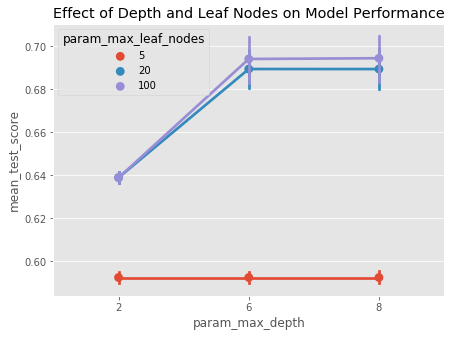

In [510]:
df = pd.DataFrame(data=grid_cv_dtm.cv_results_)
df.head()

fig,ax = plt.subplots()
sns.pointplot(data=df[['mean_test_score',
                           'param_max_leaf_nodes',
                           'param_max_depth']],
             y='mean_test_score',x='param_max_depth',
             hue='param_max_leaf_nodes',ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")

In [512]:
# Checking the training model scores
r2_scores = cross_val_score(grid_cv_dtm.best_estimator_, x_train, y_train, cv=10)
mse_scores = cross_val_score(grid_cv_dtm.best_estimator_, x_train, y_train, cv=10,scoring='neg_mean_squared_error')

print("avg R-squared::{:.3f}".format(np.mean(r2_scores)))
print("MSE::{:.3f}".format(np.mean(mse_scores)))

avg R-squared::0.762
MSE::-0.038


In [764]:
## Test dataset evaluation

from sklearn import metrics

best_dtm_model = grid_cv_dtm.best_estimator_

y_pred = best_dtm_model.predict(x_test)
residuals = y_test - y_pred


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2_score = best_dtm_model.score(x_test,y_test)
print("R-squared:{:.3f}".format(r2_score))
print("MSE: %.2f" % metrics.mean_squared_error(y_test, y_pred))
print("RMSE: {:.3f}".format(rmse))

R-squared:0.766
MSE: 0.04
RMSE: 0.188


In [639]:
##Prediction for Decision Tree

y_train_net = grid_cv_dtm.predict(x_train)
y_test_net = grid_cv_dtm.predict(x_test)

# print("Lasso RMSE on Training set :", rmsle(y_train, y_train_las).mean())
# print("Lasso RMSE on Validation set :", rmsle(y_test, y_test_las).mean())

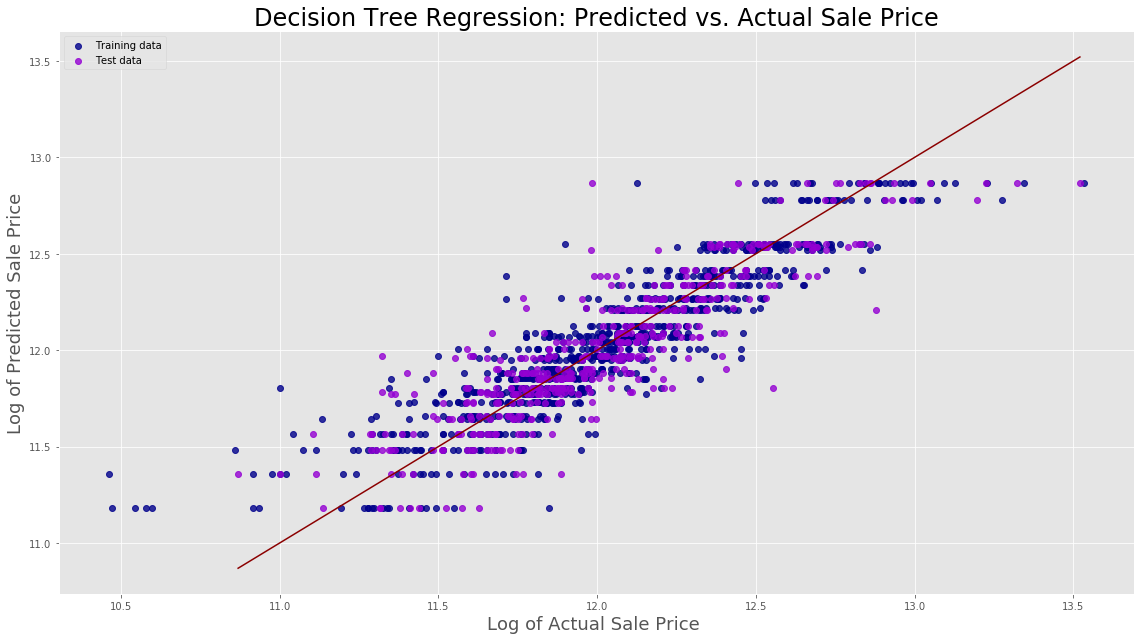

In [640]:
## Prediction for Decision Tree -- graph

plt.figure(figsize=(16, 9))
sns.regplot(x=y_train, y=y_train_net, fit_reg=False, color = 'darkblue', label = "Training data")
sns.regplot(x=y_test, y=y_test_net, fit_reg=False, color = 'darkviolet', label = "Test data")
 
plt.title('Decision Tree Regression: Predicted vs. Actual Sale Price', fontsize=24)
plt.xlabel('Log of Actual Sale Price ', fontsize=18)
plt.ylabel('Log of Predicted Sale Price', fontsize=18)
plt.legend(loc = "upper left")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'darkred')
plt.tight_layout()

**Random Forest**

In [582]:
randomForest.set_params(random_state=42, n_estimators=5000, max_features=2)
randomForest.fit(houseFeatures2, saleprice) # fit 
randomForest.score(houseFeatures2, saleprice) # accuracy

0.9790777160165927

In [583]:
randomForest.set_params(random_state=42, n_estimators=5000, max_features=2)
randomForest.fit(x_train, y_train) # fit 
randomForest.score(x_train, y_train) # accuracy

0.9764101919536684

In [765]:
y_pred = randomForest.predict(x_test)
#residuals = y_test - y_pred

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE: %.2f" % metrics.mean_squared_error(y_test, y_pred))
print("RMSE: {:.3f}".format(rmse))

MSE: 0.02
RMSE: 0.140


In [473]:
predictions = randomForest.predict(houseFeaturesT2)

In [474]:
predictions

array([12.24869659, 12.0829156 , 12.32893877, ..., 12.41285656,
       11.85193657, 11.86379166])

In [585]:
bagging.set_params(n_estimators=50, random_state=42, max_features=57)
bagging.fit(x_train, y_train)
bagging.score(x_train, y_train) # accuracy
print("The training error of bagging forest is: %.5f" %(1 - bagging.score(x_train, y_train)))
print("The test     error of bagging forest is: %.5f" %(1 - bagging.score(x_test, y_test)))

print("The train R^2 of bagging forest is: %.5f" %(bagging.score(x_train, y_train)))
print("The test R^2 of bagging forest is: %.5f" %(bagging.score(x_test, y_test)))

The training error of bagging forest is: 0.02514
The test     error of bagging forest is: 0.12203
The train R^2 of bagging forest is: 0.97486
The test R^2 of bagging forest is: 0.87797


In [586]:
y_pred = bagging.predict(x_test)

print("MSE: %.2f" % metrics.mean_squared_error(y_test, y_pred))

MSE: 0.02


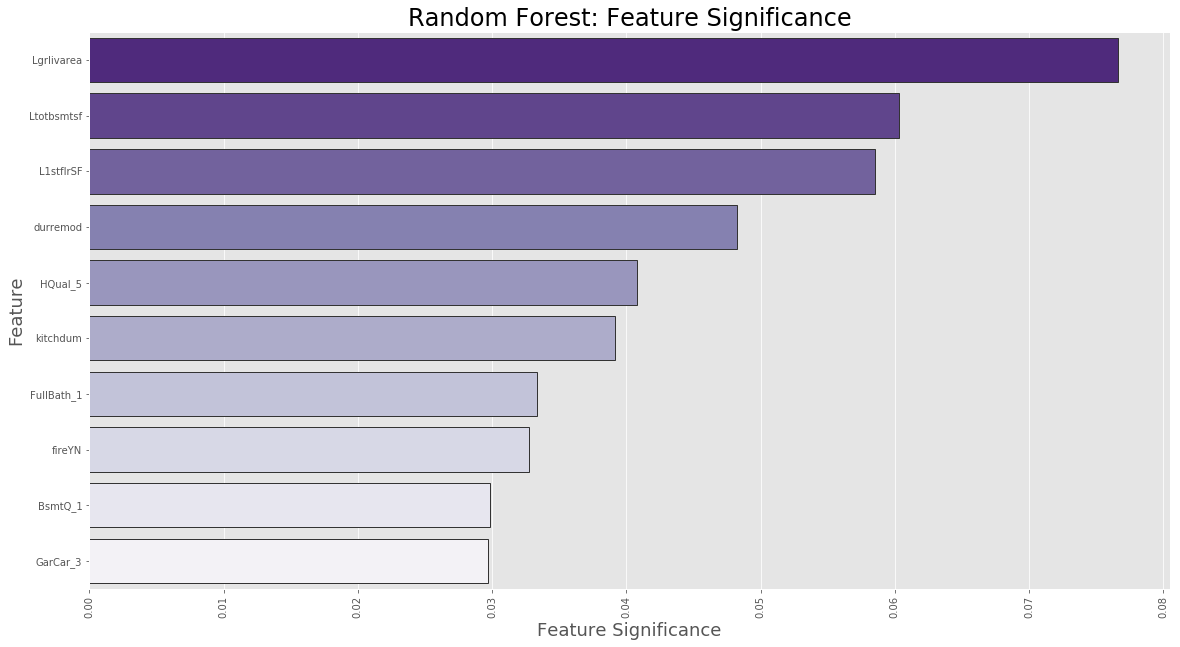

In [642]:
# Lets have a look at which features that the Random Forest regressor identifies as being significant (graph)
# Code needs debugging.

coef = pd.Series(randomForest.feature_importances_, index = x_train.columns).sort_values(ascending=False)
coef = coef.head(10).to_frame()
coef.columns = ['Feature Significance']

plt.subplots(figsize=(16, 9))
plt.title('Random Forest: Feature Significance',fontsize=24)
plt.xlabel('Significance', fontsize=18)
plt.ylabel('Feature', fontsize=18)
plt.xticks(rotation=90)
plt.tight_layout()
sns.barplot(x='Feature Significance', y=coef.index, data=coef, palette='Purples_r', linewidth=1.0, edgecolor=".2")

In [605]:
## GridSearchCV on Random Forests

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
rf_grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)


# Fit the random search model
rf_grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed: 15.3min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [606]:
rf_grid_search.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [791]:
rf_10_r2 = rf_grid_search.best_score_
rf_10_r2

0.7793508351275996

In [798]:
y_pred = rf_grid_search.predict(x_test)

rf_10_mse = mean_squared_error(y_test, y_pred)
rf_10_rmse = np.sqrt(mse)

print("MSE: %.20f" % metrics.mean_squared_error(y_test, y_pred))
print("RMSE: {}".format(rmse))

MSE: 0.02628713979832181247
RMSE: 0.12938441187822705


In [609]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

best_grid = rf_grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, x_test, y_test)

Model Performance
Average Error: 0.1109 degrees.
Accuracy = 99.08%.


In [610]:
base_accuracy = evaluate(randomForest, x_test, y_test)

Model Performance
Average Error: 0.0968 degrees.
Accuracy = 99.19%.


In [615]:
# Predict the values of SalePrice for training and validation datasets
y_rf_train = rf_grid_search.predict(x_train)
y_rf_test = rf_grid_search.predict(x_test)

#print("Random Forest RMSE on Training set :", mse(y_train, y_rf_train).mean())
#print("Random Forest RMSE on Validation set :", mse(y_test, y_rf_test).mean())

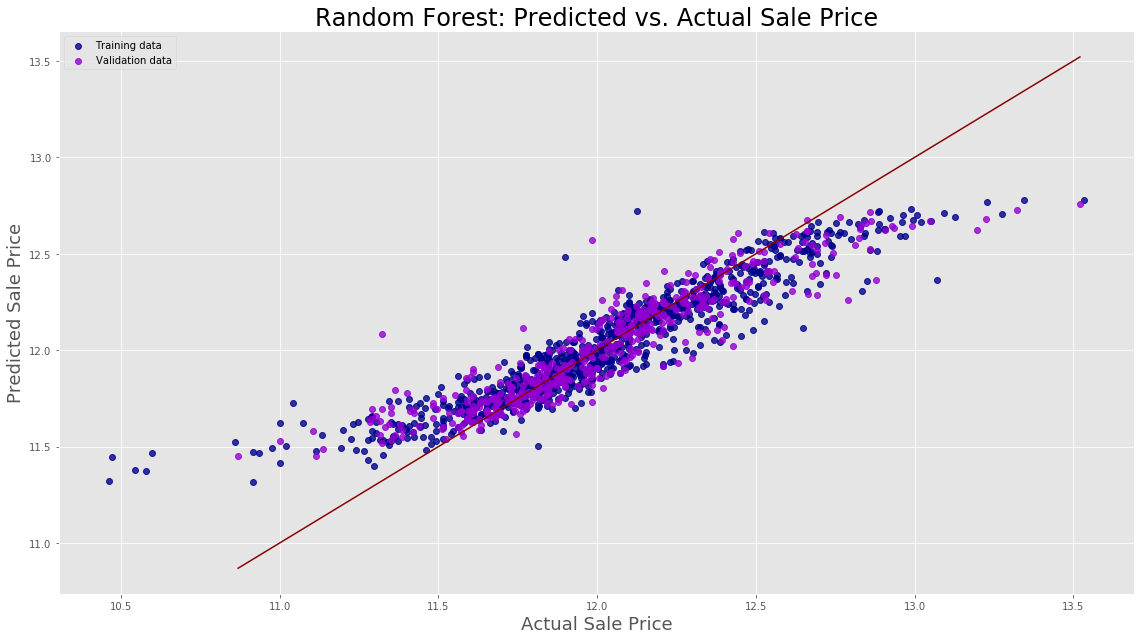

In [616]:
##How does RF perform on predicted saleprice relative to the actual saleprice (graph)

plt.figure(figsize=(16, 9))

sns.regplot(x=y_train, y=y_rf_train, fit_reg=False, color = 'darkblue', label = "Training data")
sns.regplot(x=y_test, y=y_rf_test, fit_reg=False, color = 'darkviolet', label = "Validation data")

plt.title('Random Forest: Predicted vs. Actual Sale Price', fontsize=24)
plt.xlabel('Actual Sale Price', fontsize=18)
plt.ylabel('Predicted Sale Price', fontsize=18)
plt.legend(loc = "upper left")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'darkred')
plt.tight_layout()

## Graphs for R^2, MSE, RMSE across models

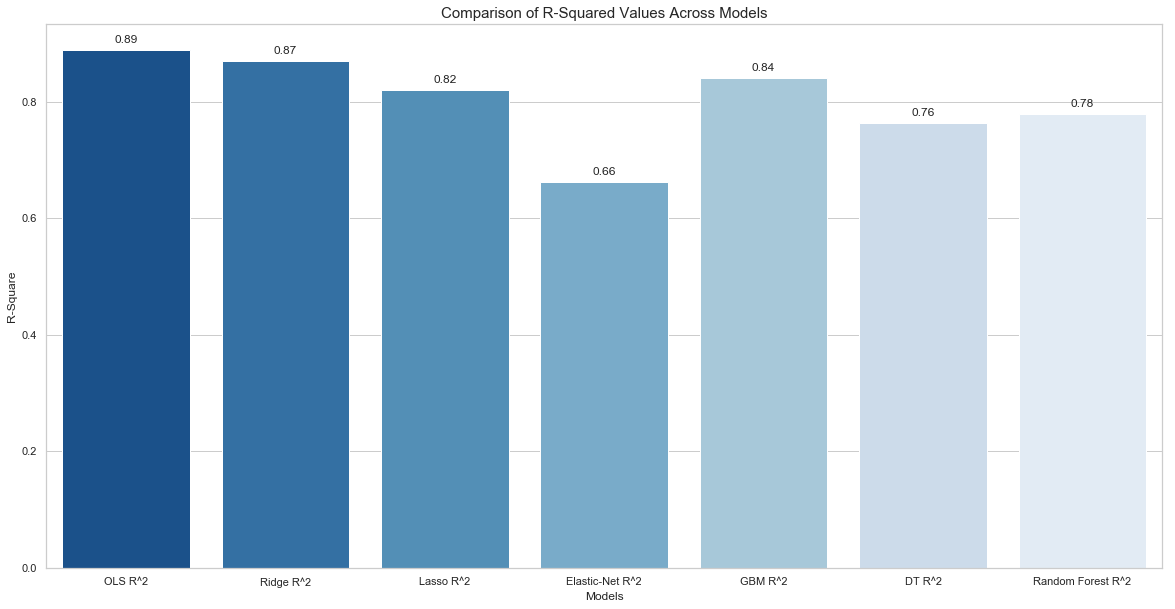

In [803]:
## Create Key-Value pairs of the R2, MSE, RMSE data from the different models

## R^2

data = {'OLS R^2': 0.8889304190096317, 'Ridge R^2': 0.8705857898889647, 'Lasso R^2': 0.821144415486029, 
        'Elastic-Net R^2': 0.6625024046295704, 'GBM R^2': 0.8416138260749035, 'DT R^2': 0.7642910806642037, 
        'Random Forest R^2': 0.7793508351275996}
names = list(data.keys())
values = list(data.values())


sns.set(style="whitegrid")

plt.figure(figsize=(20,10))

splot = sns.barplot(names, values, palette ="Blues_r", alpha=1.0)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Comparison of R-Squared Values Across Models', fontsize=15)
plt.ylabel('R-Square', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.show()

#fig, axs = plt.subplots(1, 1, figsize=(20, 10), sharey=False)
#axs.bar(names, values)

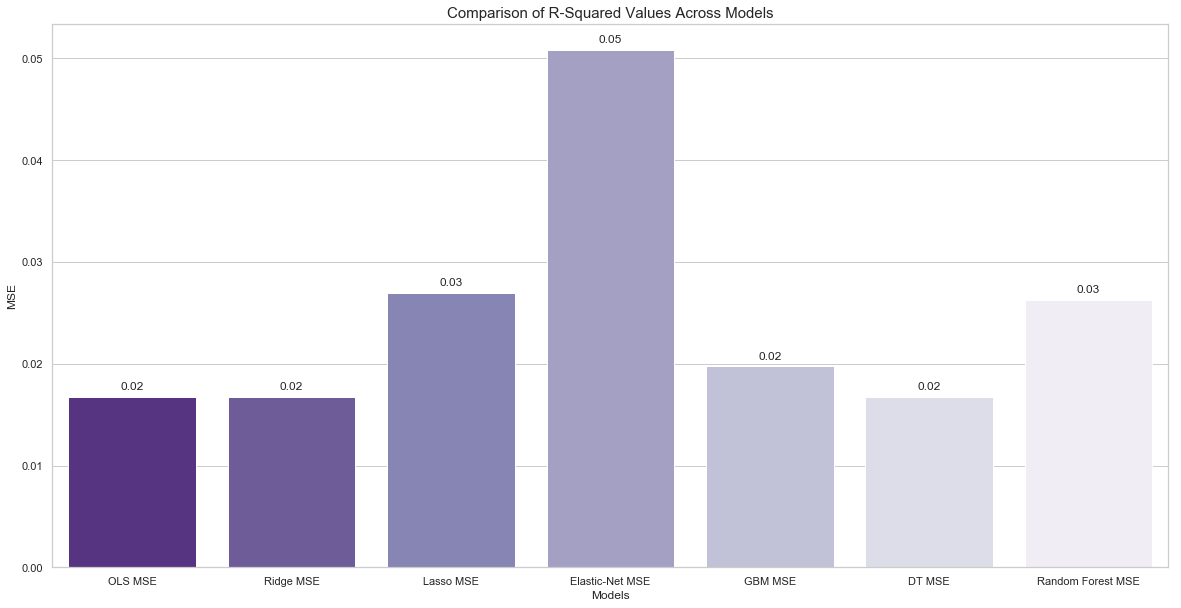

In [804]:
## MSE

data = {'OLS MSE': 0.016740326037074704, 'Ridge MSE': 0.016740326037074704, 'Lasso MSE': 0.026956982925640874, 
        'Elastic-Net MSE': 0.05086739080900685, 'GBM MSE': 0.01977278185805815, 'DT MSE': 0.016740326037074704, 
        'Random Forest MSE': 0.02628713979832181247}
names = list(data.keys())
values = list(data.values())


sns.set(style="whitegrid")

plt.figure(figsize=(20,10))

splot = sns.barplot(names, values, palette ="Purples_r", alpha=1.0)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Comparison of MSE Values Across Models', fontsize=15)
plt.ylabel('MSE', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.show()



# fig, axs = plt.subplots(1, 1, figsize=(20, 10), sharey=False)
# axs.bar(names, values)

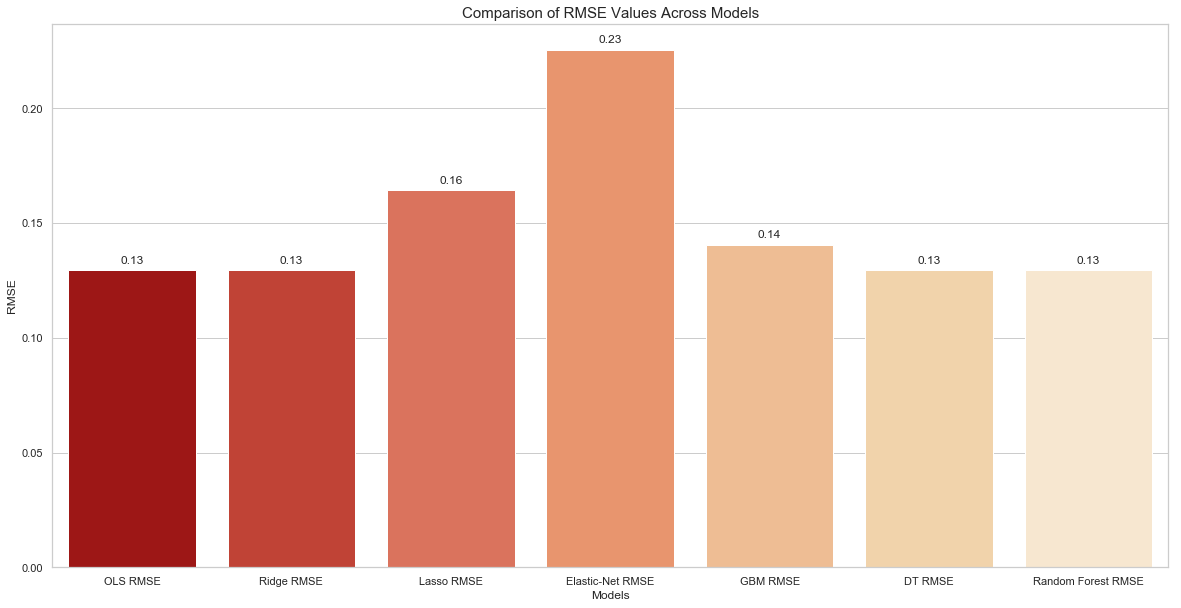

In [808]:
## RMSE

data = {'OLS RMSE': 0.12938441187822705, 'Ridge RMSE': 0.12938441187822705, 'Lasso RMSE': 0.16418581828416506, 
        'Elastic-Net RMSE': 0.22553800302611277, 'GBM RMSE': 0.14061572407827708, 'DT RMSE': 0.12938441187822705, 
        'Random Forest RMSE': 0.12938441187822705}
names = list(data.keys())
values = list(data.values())


sns.set(style="whitegrid")

plt.figure(figsize=(20,10))

splot = sns.barplot(names, values, palette ="OrRd_r", alpha=1.0)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Comparison of RMSE Values Across Models', fontsize=15)
plt.ylabel('RMSE', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.show()




# fig, axs = plt.subplots(1, 1, figsize=(20, 10), sharey=False)
# axs.bar(names, values)

## Create the prediction .csv using the Ridge model.

In [981]:
houseFeaturesT2.head()
# houseFeaturesT2.index.names = ['Id']
# houseFeaturesT2.head()

,HQual_2,HQual_3,HQual_4,HQual_5,Lgrlivarea,Blueste,BrDale,BrkSide,ClearCr,CollgCr,...,BsmtC_2,BsmtC_3,GarQual_1,GarQual_2,GarQual_3,GarFin_1,GarFin_2,GarFin_3,BsmtQ_1,BsmtQ_2
0,1,0,0,0,6.797940,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
1,0,1,0,0,7.192182,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
2,1,0,0,0,7.395722,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
3,0,1,0,0,7.380256,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
4,0,0,0,1,7.154615,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0


In [993]:
Id_T.head()

,Id
0,1461
1,1462
2,1463
3,1464
4,1465


In [902]:
houseFeaturesT2.shape

(1459, 79)

In [1006]:
## Best model seems to be ridge, so use that for predicting the test.csv

#SP = np.exp(ridge_regressor.predict(houseFeaturesT2))
#SP

x= pd.concat([Id_T, pd.Series(np.exp(ridge_regressor.predict(houseFeaturesT2))).rename('SalePrice')], 
             axis=1)[['Id','SalePrice']].set_index('Id')

x.head()
x.shape
type(x)

# x = pd.concat([dtest.reset_index(), pd.Series(np.exp(cv_ridge.predict(rob.transform(dtest)))).rename('SalePrice')], 
#               axis=1)[['Id', 'SalePrice']].set_index('Id')

pandas.core.frame.DataFrame

In [1016]:
## Output the ridge results to a new dataframe

x.to_csv('ridge_result.csv')

In [1008]:
test2 = pd.read_csv('ridge_result.csv', index_col=0)

In [1009]:
test2.head()

,SalePrice
Id,
1461,108151.746331
1462,158565.890230
1463,188825.405695
1464,191758.613227
1465,210073.515923


In [1013]:
# Next best is the Gradient Boosting, so use that as well. 

z= pd.concat([Id_T, pd.Series(np.exp(classifier.predict(houseFeaturesT2))).rename('SalePrice')], 
             axis=1)[['Id','SalePrice']].set_index('Id')

z.head()
z.shape
type(z)


pandas.core.frame.DataFrame

In [1015]:
## Output the GBM results to a new dataframe
z.to_csv('gbm_result.csv')

In [1030]:
# Now try predicting using OLS

a= pd.concat([Id_T, pd.Series(np.exp(lm.predict(houseFeaturesT2))).rename('SalePrice')], 
             axis=1)[['Id','SalePrice']].set_index('Id')

a.head()
a.shape
type(a)


pandas.core.frame.DataFrame

In [1031]:
## Output the OLS results to a new dataframe
a.to_csv('OLS_result.csv')